#Imports


In [38]:
!apt-get update
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super
!sudo apt install texlive-latex-base

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [85.0 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [4,035 kB]
Get:13 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 Packages [

In [ ]:
#Installs

!pip install qutip
!pip install mosek
!pip install qiskit
!pip install latex
!pip install pickle
!pip install cvxpy
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7589 sha256=d6f8091802561744daf10ff76d430aee6d012f19d6b1383692e398ad7bf71138
  Stored in directory: /root/.cache/pip/wheels/4c/6e/66/29e29480ca5a0c0b2c628bec4e37c21f3eafcd53b0282b48e2
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7226 sha256=544df665d97fdc08252733dc1f21dbed7067eb08e9604e11ab27802e1c2f0658
  Stored in directory: /root/.cache/pip/wheels/0e/

In [ ]:
from scipy.stats import unitary_group
import os
import qiskit as qt
from qiskit.quantum_info import Choi
from qiskit.quantum_info import diamond_norm
import matplotlib.pyplot as plt
import pickle
#import qutip as qp
import numpy as np
import cvxpy as cp
from scipy.linalg import sqrtm, fractional_matrix_power, expm
from typing import Optional, Tuple, List, Dict, Callable
from matplotlib.ticker import LogFormatterExponent
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
#import mosek
import numpy as np
import matplotlib as mpl
plt.rcParams.update({'font.size': 20})

plt.rcParams['text.usetex'] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"


fmt = ScalarFormatter(useMathText=True)   # use math text: 5.0×10^4
fmt.set_scientific(True)                 # allow scientific notation
fmt.set_powerlimits((0, 0))              # force sci notation for numbers >= 10**0
fmt.set_useOffset(False)
np.set_printoptions(precision=2, suppress= True)


#path_mosek = r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\mosek.lic"
path_mosek = "/content/mosek.lic"

os.environ.setdefault("MOSEKLM_LICENSE_FILE", path_mosek)  # Replace with your path


!mkdir -p /root/mosek

# Move the license file to the correct location
!mv /content/mosek.lic /root/mosek/

# Verify it's there
!ls /root/mosek/






mosek.lic


#utils.py

In [33]:

def calculate_eigenvalues(matrix):
  eigenvalues = []
  threshold = 1e-15
  for i in range( np.linalg.eigvals(matrix).shape[0]):
    if abs(np.imag(np.linalg.eigvals(matrix)[i])) < threshold:
      eigenvalues.append(float(np.real(np.linalg.eigvals(matrix)[i])))

  for i in range(len(eigenvalues)):
    if abs(eigenvalues[i]) < threshold:
      eigenvalues[i] = 0

  return eigenvalues

def partial_transpose(rho, dims, subsystems_to_transpose):
    """
    Compute the partial transpose of a density matrix.

    Parameters:
        rho: numpy.ndarray
            Density matrix of the quantum state
        dims: list or tuple
            Dimensions of each subsystem (e.g., [2, 2] for two qubits)
        subsystems_to_transpose: list
            Indices of subsystems to transpose (0-based)

    Returns:
        numpy.ndarray: The partially transposed density matrix
    """
    # Reshape the density matrix into a tensor with indices for each subsystem
    tensor = rho.reshape(dims + dims)

    # Determine which indices to transpose
    n = len(dims)
    transpose_indices = list(range(2*n))
    for i in subsystems_to_transpose:
        transpose_indices[n + i], transpose_indices[i] = transpose_indices[i], transpose_indices[n + i]

    # Perform the partial transpose
    transposed_tensor = np.transpose(tensor, axes=transpose_indices)

    # Reshape back to a density matrix
    return transposed_tensor.reshape(rho.shape)

def partial_trace(input, dims: List[int], axis: Optional[int] = 0) -> np.array:
  """
  Calculate the partial trace for a 2D matrix and 2 subsystems.

  Parameters
  ----------
  input : np.array
      The 2D matrix to take the partial trace of.
  dims : tuple of ints
      A tuple of ints enconding the dimensions of each subsystem (working only with two subsystems)
  axis : int
      The index of the subsystem in which will take the partial trace.

  Returns
  -------
  np.array
      The partial trace of the input matrix.

  """
  if len(dims) > 2:
    raise ValueError("The number of subsystems exceeds 2.")
    return None

  if axis == 0:
    result = 0
    for i in range(dims[axis]):
      basis_element = np.zeros(dims[axis])
      basis_element[i] = 1
      left_kraus_op = np.kron(basis_element,np.eye(dims[axis+1]))
      result += left_kraus_op @ input @ left_kraus_op.conj().T
    return result
  else:
    result = 0
    for i in range(dims[axis]):
      basis_element = np.zeros(dims[axis])
      basis_element[i] = 1
      left_kraus_op = np.kron(np.eye(dims[axis-1]),basis_element)
      result += left_kraus_op @ input @ left_kraus_op.conj().T
    return result



def petz_recovery_map(rho_A, kraus_ops):
    """
    Implement the Petz recovery map R_A|C using Kraus operators of the channel to be recovered.

    Parameters:
    - rho_A: Initial density matrix (dim_A x dim_A)
    - kraus_ops: List of Kraus operators [K_1, K_2, ...] where each K_i is (dim_C x dim_A)

    Returns:
    - A function representing the Petz recovery map R_A|C that acts on density matrices in C
    """
    dim_A = rho_A.shape[0]
    dim_C = kraus_ops[0].shape[0] #As kraus_CG is composed by (2x4) matrices, dim_C =2, as it should!

    # Compute rho_C = E_C|A(rho_A) = sum_i K_i rho_A K_i^†
    rho_C = sum(K @ rho_A @ K.conj().T for K in kraus_ops)

    # Compute the square roots and inverse square roots
    sqrt_rho_A = fractional_matrix_power(rho_A, 0.5)
    inv_sqrt_rho_C = fractional_matrix_power(rho_C, -0.5)

    # Pre-compute the adjoint Kraus operators for the recovery map
    adjoint_kraus = [sqrt_rho_A @ K.conj().T @ inv_sqrt_rho_C for K in kraus_ops] #\rho_A^{1/2} K^{\dagger}(\rho_b^{-1/2})

    def recovery_map(input_state):
        """
        The Petz recovery map R_A|C applied to a input state

        Parameters:
        - input_state: Density matrix in system C (dim_C x dim_C)

        Returns:
        - Recovered density matrix in system A (dim_A x dim_A)
        """
        # Apply the recovery map using the adjoint Kraus operators
        #return sum(A @ sigma_C @ A.conj().T for A in adjoint_kraus)

        #Computing the action of the recovery map
        return sum(sqrt_rho_A @ K.conj().T @ inv_sqrt_rho_C @ input_state @ inv_sqrt_rho_C @ K @ sqrt_rho_A for K in kraus_ops)

    return recovery_map


#Kraus operators of the blurred and saturated detector
def kraus_CG():
  return [np.array([[1,0,0,0],
                    [0, 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]]),
                    np.array([[0,0,0,0],
                    [0,1/np.sqrt(3),0,-1/np.sqrt(3)]]),
                    np.array([[0,0,0,0],
                    [0,1/np.sqrt(3),-1/np.sqrt(3),0]]),
                    np.array([[0,0,0,0],
                    [0,0,1/np.sqrt(3),-1/np.sqrt(3)]])]

#Defining the acting of the coarse graining map as the blurred and saturated detector
def coarse_graining_blursatur(input):
    kraus_CG_operators = kraus_CG()
    return sum(K @ input @ K.conj().T for K in kraus_CG_operators)

#===================================================================================
#Defining the acting of the coarse graining map as the partial trace over the second subsystem:

def kraus_partial_trace_B():
    ket_0 = np.array([[1],[0]])
    ket_1 = np.array([[0],[1]])

    K_0 = np.kron(np.eye(2), ket_0.T)
    K_1 = np.kron(np.eye(2),ket_1.T)
    return [K_0, K_1]

def coarse_graining_partial_trace_B(input):
  return sum(K @ input @ K.conj().T for K in kraus_partial_trace_B())


def define_all(d_A,d_B,d_C,d_D,rho_A,kraus_op, coarse_graining_map,unitary_channel):
    #Defining the Petz' recovery map for a given rho_A
    recovery_map = petz_recovery_map(rho_A, kraus_op)

    #Defining the choi states
    choi_CG = calc_choi_CG(d_A, d_C, coarse_graining_map)
    choi_U = calc_choi_U(d_A,d_B,unitary_channel)

    #Via the action of \Gamma^{petz}
    choi_Gamma_petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_map, unitary_channel)

    return choi_CG, choi_U, choi_Gamma_petz

def generate_werner_Bell_projection (l: float) -> np.array:

  """
   Funtion to generate Werner states with the projection onto the Bell state |\psi^->

  Parameters
  ----------
  p: float
    Pameter of the Werner state between 0 and 1.

  Returns
  -------
  np.ndarray
    Werner state of dimension 4x4
  """
  return (l/2)* np.array([[0,0,0,0],[0,1,-1,0],[0,-1,1,0],[0,0,0,0]]) + ((1-l)/4)* np.eye(4)



<>:176: SyntaxWarning: invalid escape sequence '\p'
<>:176: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3135611678.py:176: SyntaxWarning: invalid escape sequence '\p'
  Funtion to generate Werner states with the projection onto the Bell state |\psi^->


# Aux

## Recovery map

In [ ]:

def petz_recovery_map(rho_A, kraus_ops):
    """
    Implement the Petz recovery map R_A|C using Kraus operators of the channel to be recovered.

    Parameters:
    - rho_A: Initial density matrix (dim_A x dim_A)
    - kraus_ops: List of Kraus operators [K_1, K_2, ...] where each K_i is (dim_C x dim_A)

    Returns:
    - A function representing the Petz recovery map R_A|C that acts on density matrices in C
    """
    dim_A = rho_A.shape[0]
    dim_C = kraus_ops[0].shape[0] #As kraus_CG is composed by (2x4) matrices, dim_C =2, as it should!

    # Compute rho_C = E_C|A(rho_A) = sum_i K_i rho_A K_i^†
    rho_C = sum(K @ rho_A @ K.conj().T for K in kraus_ops)

    # Compute the square roots and inverse square roots
    sqrt_rho_A = fractional_matrix_power(rho_A, 0.5)
    inv_sqrt_rho_C = fractional_matrix_power(rho_C, -0.5)

    # Pre-compute the adjoint Kraus operators for the recovery map
    adjoint_kraus = [sqrt_rho_A @ K.conj().T @ inv_sqrt_rho_C for K in kraus_ops] #\rho_A^{1/2} K^{\dagger}(\rho_b^{-1/2})

    def recovery_map(input_state):
        """
        The Petz recovery map R_A|C applied to a input state

        Parameters:
        - input_state: Density matrix in system C (dim_C x dim_C)

        Returns:
        - Recovered density matrix in system A (dim_A x dim_A)
        """
        # Apply the recovery map using the adjoint Kraus operators
        #return sum(A @ sigma_C @ A.conj().T for A in adjoint_kraus)

        #Computing the action of the recovery map
        return sum(sqrt_rho_A @ K.conj().T @ inv_sqrt_rho_C @ input_state @ inv_sqrt_rho_C @ K @ sqrt_rho_A for K in kraus_ops)

    return recovery_map




## Calculating the Choi state of $\Lambda^{CG}_{C|A}$

In [ ]:
#Kraus operators of the blurred and saturated detector
def kraus_CG():
  return [np.array([[1,0,0,0],
                    [0, 1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]]),
                    np.array([[0,0,0,0],
                    [0,1/np.sqrt(3),0,-1/np.sqrt(3)]]),
                    np.array([[0,0,0,0],
                    [0,1/np.sqrt(3),-1/np.sqrt(3),0]]),
                    np.array([[0,0,0,0],
                    [0,0,1/np.sqrt(3),-1/np.sqrt(3)]])]

#Defining the acting of the coarse graining map as the blurred and saturated detector
def coarse_graining_blursatur(input):
    kraus_CG_operators = kraus_CG()
    return sum(K @ input @ K.conj().T for K in kraus_CG_operators)

#===================================================================================
#Defining the acting of the coarse graining map as the partial trace over the second subsystem:

def kraus_partial_trace_B():
    ket_0 = np.array([[1],[0]])
    ket_1 = np.array([[0],[1]])

    K_0 = np.kron(np.eye(2), ket_0.T)
    K_1 = np.kron(np.eye(2),ket_1.T)
    return [K_0, K_1]

def coarse_graining_partial_trace_B(input):
  return sum(K @ input @ K.conj().T for K in kraus_partial_trace_B())


In [ ]:
def calc_choi_CG(d_A, d_C, coarse_graining):
    #Defining the computational basis
    ket_0 = np.array([[1],[0]])
    ket_1 = np.array([[0],[1]])

    #Computational basis of C^2 ⊗ C^2
    ket_00 = np.kron(ket_0,ket_0) #0
    ket_01 = np.kron(ket_0,ket_1) #1
    ket_10 = np.kron(ket_1,ket_0) #2
    ket_11 = np.kron(ket_1,ket_1) #3

    ket_array = [ket_00,ket_01,ket_10,ket_11]
    outer_products = []

    #Creating the 4x4 matrices from the computational basis of C^2 ⊗ C^2
    for i in range(len(ket_array)): #Setting the ket in each i-th iteration
        outer_products.append([np.kron(ket_array[i],ket_array[j].T) for j in range(len(ket_array))]) #Appending each matrix for a given i row
        #outer_products = [[|00X00|,|00X01|, |00X10|, |00X11|], [...], ...]

    #Computing the Choi state of the coarse graining map \Lambda_{C|A}
    indv_terms = []
    for i in range(len(outer_products)): #Calculating each application of the \Lambda_{C|A} individually
      indv_terms.append([np.kron(outer_products[i][j],coarse_graining(outer_products[i][j])) for j in range(len(outer_products[i]))])
      #indv_term = [[|00X00| ⊗ \Lambda_{C|A}(|00X00|),|00X01| ⊗ \Lambda_{C|A}(|00X01|), ... ], [|01X00| ⊗ \Lambda_{C|A}(|01X00|), ...], ...]

    #Adding all the terms to get the Choi state rho_{C|A} of the unitary map \Lambda_{C|A}
    choi_CG = sum(indv_terms[i][j] for i in range(len(indv_terms)) for j in range(len(indv_terms[i]))) # = |00X00| ⊗ \Lambda_{C|A}(|00X00| + |00X01| ⊗ \Lambda_{C|A}(|00X01|) + ...

    return choi_CG


## Calculating the Choi state of $\mathcal{U}_{B|A}$

In [ ]:
def calc_choi_U(d_A, d_B, unitary_channel):
    #Defining the computational basis
    ket_0 = np.array([[1],[0]])
    ket_1 = np.array([[0],[1]])

    #Computational basis of C^2 ⊗ C^2
    ket_00 = cp.kron(ket_0,ket_0) #0
    ket_01 = cp.kron(ket_0,ket_1) #1
    ket_10 = cp.kron(ket_1,ket_0) #2
    ket_11 = cp.kron(ket_1,ket_1) #3

    ket_array = [ket_00.value,ket_01.value,ket_10.value,ket_11.value]
    outer_products = []

    #Creating the 4x4 matrices from the computational basis of C^2 ⊗ C^2
    for i in range(len(ket_array)): #fixing the ket in each i-th iteration
        outer_products.append([np.kron(ket_array[i],ket_array[j].T) for j in range(len(ket_array))]) #Appending each matrix for a given i row
        #outer_products = [[|00X00|,|00X01|, |00X10|, |00X11|], [...], ...]

    #Computing the Choi state of the map U_{B|A}
    indv_terms = []
    for i in range(len(outer_products)): #Calculating each application of the U_{B|A} individually
      indv_terms.append([np.kron(outer_products[i][j],unitary_channel(outer_products[i][j])) for j in range(len(outer_products[i]))])
      #indv_term = [[|00X00| ⊗ U_{B|A}(|00X00|),|00X01| ⊗ U_{B|A}(|00X01|), ... ], [|01X00| ⊗ U_{B|A}(|01X00|), ...], ...]

    #Adding all the terms to get the Choi state rho_{B|A} of the unitary map U_{B|A}
    choi_U = sum(indv_terms[i][j] for i in range(len(indv_terms)) for j in range(len(indv_terms[i]))) # = |00X00| ⊗ U_{B|A}(|00X00| + |00X01| ⊗ U_{B|A}(|00X01|) + ...

    return choi_U

### $\mathcal{U}^{\sigma_z}_{B|A}(\cdot) = U_t(\cdot)U^{\dagger}_t; \\U_t = e^{i \sigma_z \otimes \sigma_z t}$

In [ ]:
def sigma_z():
    """Pauli-Z matrix."""
    return np.array([[1, 0], [0, -1]])

#Letting U = e^{i \sigma_z ⊗ \sigma_z t}
def unitary_evolution(t):
    """Alternative using scipy.linalg.expm."""
    sz = sigma_z()
    sz_sz = np.kron(sz, sz)
    U = expm(1j* sz_sz * t)
    return U

#Defining the z-interaction channel
def unitary_channel_sigma_z(t=1):

  U = unitary_evolution(t)

  def unitary_channel_sigma_z_act(input):
      return U @ input @ U.conj().T

  return unitary_channel_sigma_z_act



### $\mathcal{U}_{B|A}(\cdot) = U_{swap}(\cdot)U^{\dagger}_{swap};$


$U_{swap} = \begin{pmatrix} 1&  0&0&0 \\ 0& 0&1&0 \\0&1&0&0 \\0&0&0&1   \end{pmatrix}$

In [ ]:
#Defining the U_{B|A}
def unitary_channel_swap(input):
  U = np.array([[1,0,0,0],
                [0,0,1,0],
                [0,1,0,0],
                [0,0,0,1]])
  return U @ input @ U.conj().T


In [ ]:
def id_channel(input):
    U = np.array([[1,0,0,0],
                  [0,1,0,0],
                  [0,0,1,0],
                  [0,0,0,1]])
    return U @ input @ U.conj().T




## Constructing the Choi state of $\Gamma^{petz}$


### Via the action of $\Gamma^{petz}(\cdot)$

$\Gamma^{petz} : \mathcal{L}(H_C) ⟶ \mathcal{L}(H_D) $

$\Gamma^{petz}(\cdot) = Λ^{CG}_{D|B} \circ \mathcal{U}_{B|A} \circ \mathcal{R}^\Lambda_{A|C}(\cdot)$

In [ ]:
def Gamma_petz(input,recovery, coarse_graining,unitary_channel):
    return coarse_graining(unitary_channel(recovery(input)))

def calc_choi_Gamma_petz_act(d_C, d_D,recovery,coarse_graining,unitary_channel):

    #Defining the computational basis of C^2
    ket_0 = np.array([[1],[0]])
    ket_1 = np.array([[0],[1]])

    ket_array = [ket_0, ket_1]
    outer_products = []

    #Creating the 2x2 matrices from the computational basis of C^2
    for i in range(len(ket_array)): #fixing the ket in each i-th iteration
        outer_products.append([np.kron(ket_array[i],ket_array[j].T) for j in range(len(ket_array))]) #Appending each matrix for a given ith row
        #outer_products = [[|0X0|,|0X1|], ... ]

    #Computing the Choi state of the \Gamma^{petz}
    indv_terms = []
    for i in range(len(outer_products)): #Calculating each application of the U_{B|A} individually
      indv_terms.append([np.kron(outer_products[i][j],Gamma_petz(outer_products[i][j],recovery,coarse_graining,unitary_channel)) for j in range(len(outer_products[i]))])
      #indv_term = [[|0X0| ⊗ \Gamma(|0X0|),|0X1| ⊗ \Gamma(|0X1|)], ... ]

    #Adding all the terms to get the Choi state rho^{petz}_{D|C} of the \Gamma^{petz}
    choi_Gamma_petz = sum(indv_terms[i][j] for i in range(len(indv_terms)) for j in range(len(indv_terms[i]))) # = |0X0| ⊗ \Gamma(|0X0|) + |0X1| ⊗ \Gamma(|0X1|) +...
    return choi_Gamma_petz





# SDP implementations

## Generators definition

In [35]:
#Maximally entangled state
rho_ent =  (1/2)*  np.array([[1,0,0,1],
                      [0,0,0,0],
                      [0,0,0,0],
                      [1,0,0,1]])

#Maximally mixed state
rho_mix =  (1/4)*  np.array([[1,0,0,0],
                            [0,1,0,0],
                            [0,0,1,0],
                            [0,0,0,1]])


#Werner state
l = 1/3 #Setting the state used in the text
rho_werner = generate_werner_Bell_projection(l)


#Random state
np.random.seed(0)
A = np.random.randint(10, size=(d_A, d_A))  + 1j * np.random.randint(10, size=(d_A, d_A))
rho_random = A @ A.conj().T
rho_random = (1/np.trace(rho_random))*rho_random



initial_states = [rho_ent, rho_mix, rho_werner, rho_random]
initial_states_str = ["rho_ME","rho_MM","rho_werner","rho_random"]

## Feasibility:   $\Gamma_{D|C}$

$\Gamma_{D|C} : \Gamma_{D|C} \circ \Lambda^{CG}_{C|A} = \Lambda^{CG}_{D|B} \circ \mathcal{U}_{B|A} $

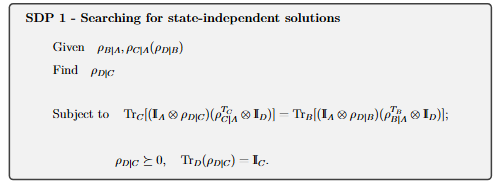

In [ ]:
def find_GammaChoi_feasibility(choi_CG,choi_U, d_A, d_B, d_C, d_D):

    #Setting the SDP variables
    choi_Gamma = cp.Variable((d_C * d_D, d_C * d_D), hermitian=True) # \in L(H_C ⊗ H_D})

    # Constraints
    constraints = []

    # 1. Commutation relation (without rho_A dependence) constraint
    # Computing the left hand side
    rho_ACD = cp.kron(np.eye(d_A),choi_Gamma) @ cp.kron(cp.partial_transpose(choi_CG,dims=[d_A,d_C],axis=1),np.eye(d_D))
    lhs = cp.partial_trace(rho_ACD,dims=[d_A,d_C,d_D],axis=1) #Partial trace over C

    # Computing the right hand side
    rho_ABD = cp.kron(np.eye(d_A),choi_CG) @ cp.kron(cp.partial_transpose(choi_U,dims=[d_A,d_B],axis=1),np.eye(d_D))
    rhs = cp.partial_trace(rho_ABD,dims=[d_A,d_B,d_D],axis=1) #Partial trace over B


    # Appending the constraint on the constraints list
    constraints.append(lhs == rhs)

    # 2. Acausal conditional state constraints
    constraints += [
        choi_Gamma >> 0,
        cp.partial_trace(choi_Gamma, dims=[d_C, d_D], axis=1) == np.eye(d_C)
    ]


    prob = cp.Problem(cp.Minimize(0), constraints) #Feasibility problem
    prob.solve(solver=cp.MOSEK, verbose=False)

    if prob.status == cp.OPTIMAL:
        return choi_Gamma.value
    else:
        print("No feasible solution found.")
        return None, None

#To do: Make a systematic test for all scenarios

if __name__ == "__main__":

    # Defining the number of rows and columns of the operators in each regions
    d_A = 4
    d_B = 4
    d_C = 2
    d_D = 2

    #Defining the given choi states
    choi_CG_blur = calc_choi_CG(d_A,d_C,coarse_graining_blursatur)
    choi_CG_trace =  calc_choi_CG(d_A,d_C, coarse_graining_partial_trace_B)

    choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)
    choi_U_sigma  = calc_choi_U(d_A,d_B, unitary_channel_sigma_z(t=1))
    choi_U_id = calc_choi_U(d_A, d_B, id_channel)

    #Running the feasibility SDP
    choi_Gamma_opt_solution = find_GammaChoi_feasibility(choi_CG_blur,choi_U_swap, d_A, d_B, d_C, d_D)

    print("\n Optimal solution achieved:")
    print(choi_Gamma_opt_solution)


 Optimal solution achieved:
[[ 1.+0.j -0.+0.j  0.+0.j  1.+0.j]
 [-0.+0.j -0.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j -0.+0.j  0.+0.j  1.+0.j]]


### Diamond norm distances

In [ ]:
diamond_distances_feasibility = {}

#Running the feasibility SDP (without rho_A dependence in the commutation constraint)
choi_Gamma_feasible = find_GammaChoi_feasibility(choi_CG_blur,choi_U_swap, d_A, d_B, d_C, d_D)

for i in range(len(initial_states)):
    #Constructing the Choi states for a fixed rho_A constructor
    rho_A_ctc = initial_states[i]
    choi_Gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,petz_recovery_map(rho_A_ctc,kraus_CG()),coarse_graining_blursatur,unitary_channel_swap)
    diamond_distances_feasibility[initial_states_str[i]] = float(round(diamond_norm(Choi(choi_Gamma_feasible) - Choi(choi_Gamma_Petz),solver="MOSEK"),4))

# Diamond norm distances
print("\n Diamond norm distance between the Gamma Petz and the Gamma feasible")
print(diamond_distances_feasibility)




 Diamond norm distance between the Gamma Petz and the Gamma feasible
{'rho_MM': 0.4226, 'rho_ME': 1.6667, 'rho_werner': 0.5528, 'rho_random': 0.7068, 'rho_test': 0.5035}


### Searching for state-independent solutions close to $\Gamma^{\text{Petz}}$




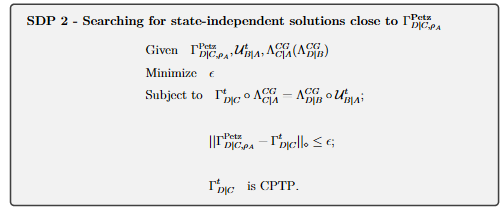

In [ ]:
def epsilon_Minimization_SDP(choi_CG, choi_Gamma_Petz,choi_U, d_A, d_B, d_C, d_D):

  """
    Find the optimal Choi matrix  that minimizes the diamond-norm distance
    to a given Petz map, under commutativity and CPTP constraints.

    Parameters:
        choi_CG : numpy.ndarray
            Choi matrix representing the coarse-graining map CG.
        choi_Gamma_Petz : numpy.ndarray
            Choi matrix of the \Gamma^{Petz}  map.
        choi_U : numpy.ndarray
            Choi matrix representing the unitary channel U.
        d_A : int
            Dimension of region A.
        d_B : int
            Dimension of region B.
        d_C : int
            Dimension of region C.
        d_D : int
            Dimension of region D.

    Returns:
        tuple:
            choi_Gamma : numpy.ndarray or None
                Optimal Choi matrix Γ that minimizes the diamond-norm distance
                to Γ_Petz, satisfying the imposed constraints.
            epsilon : float or None
                Minimum diamond-norm distance value ε. If no feasible solution
                is found, returns None.
"""

    #Setting the SDP variables
    choi_Gamma = cp.Variable((d_C * d_D, d_C * d_D), hermitian=True) # \in L(H_C ⊗ H_D})
    epsilon = cp.Variable()
    Z1 = cp.Variable((d_C * d_D, d_C * d_D), hermitian=True) # \in L(H_C ⊗ H_D})
    Z2 = cp.Variable((d_C * d_D, d_C * d_D), hermitian=True) # \in L(H_C ⊗ H_D})


    # Constraints
    constraints = []

    # 1. Commutation relation (without rho_A dependence) constraint
    # Computing the left hand side
    rho_ACD = cp.kron(np.eye(d_A),choi_Gamma) @ cp.kron(cp.partial_transpose(choi_CG,dims=[d_A,d_C],axis=1),np.eye(d_D))
    lhs = cp.partial_trace(rho_ACD,dims=[d_A,d_C,d_D],axis=1) #Partial trace over C

    # Computing the right hand side
    rho_ABD = cp.kron(np.eye(d_A),choi_CG) @ cp.kron(cp.partial_transpose(choi_U,dims=[d_A,d_B],axis=1),np.eye(d_D))
    rhs = cp.partial_trace(rho_ABD,dims=[d_A,d_B,d_D],axis=1) #Partial trace over B

    # Storing the commuting relation constraint
    constraints.append(lhs == rhs)


    # 2. Diamond norm ball constraints
    constraints += [
        choi_Gamma_Petz - choi_Gamma == Z2 - Z1,
        Z1 >> 0,
        Z2 >> 0,
        epsilon * np.eye(d_C) >>  cp.partial_trace(Z1 + Z2, dims=[d_C, d_D], axis=1)
        ]

    # 3. Acausal conditional state constraints
    constraints += [
        choi_Gamma >> 0,
        cp.partial_trace(choi_Gamma, dims=[d_C, d_D], axis=1) == np.eye(d_C)
    ]

    # Minimize epsilon
    prob = cp.Problem(cp.Minimize(epsilon), constraints) #Feasibility problem with epsilon-minimization
    prob.solve(solver=cp.MOSEK, verbose=False)

    if prob.status == cp.OPTIMAL:
        return choi_Gamma.value, epsilon.value
    else:
        print("No feasible solution found.")
        return None, None

#To do: again, do the systematic approach
if __name__ == "__main__":

    # Defining the number of rows and columns of the operators in each regions
    d_A = 4
    d_B = 4
    d_C = 2
    d_D = 2


    #Defining the given choi states
    choi_CG_blur = calc_choi_CG(d_A,d_C,coarse_graining_blursatur)
    choi_CG_trace =  calc_choi_CG(d_A,d_C, coarse_graining_partial_trace_B)

    choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)
    choi_U_sigma  = calc_choi_U(d_A,d_B, unitary_channel_sigma_z(t=1))
    choi_U_id = calc_choi_U(d_A, d_B, id_channel)

    #Defining the recovery map for a given generator
    recovery_map = petz_recovery_map(rho_werner, kraus_CG())

    #Generating the choi gamma Petz
    choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C, d_D, recovery_map, coarse_graining_blursatur,unitary_channel_swap)

    #Running the feasibility SDP
    choi_Gamma_opt_solution, epsilon_opt = epsilon_Minimization_SDP(choi_CG_blur, choi_gamma_Petz, choi_U_swap, d_A, d_B, d_C, d_D)

    print("\n Optimal solution achieved:")
    print(choi_Gamma_opt_solution)

    print("\n Optimal epsilon achieved")
    print(epsilon_opt)

    print("\nDiamond norm between the solution and the target:")
    print(diamond_norm(Choi(choi_gamma_Petz) - Choi(choi_Gamma_opt_solution)))


 Optimal solution achieved:
[[ 1.+0.j  0.+0.j -0.+0.j  1.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j  0.+0.j -0.+0.j -0.+0.j]
 [ 1.+0.j  0.+0.j -0.+0.j  1.+0.j]]

 Optimal epsilon achieved
0.5527864045379909

Diamond norm between the solution and the target:
0.5527873444994336


## Robustness aspects

### CG-robustness measure

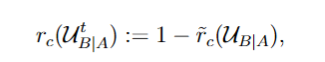

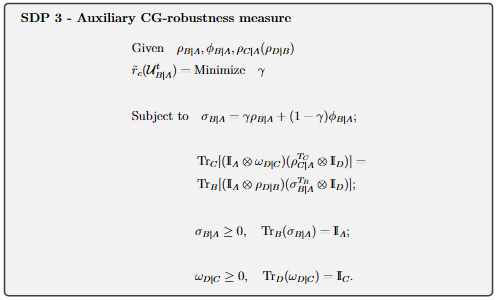

In [ ]:
def findRobustness(choi_CG,choi_U_compatible, choi_U_noise , d_A, d_B, d_C, d_D):

    #Setting the SDP variables
    choi_Gamma = cp.Variable((d_C * d_D, d_C * d_D), hermitian=True) # \in L(H_C ⊗ H_D})
    choi_U_combination = cp.Variable((d_A * d_B, d_A * d_B), hermitian=True) # \in L(H_A ⊗ H_B})
    gamma = cp.Variable() #Robustness parameter
    constraints = []

    # 1. Convex combination constraint
    constraints.append(choi_U_combination == gamma *choi_U_compatible + (1 - gamma)*choi_U_noise)

    # 2. Commutation relation (without rho_A dependence) constraint
    # Computing the left hand side
    rho_ACD = cp.kron(np.eye(d_A),choi_Gamma) @ cp.kron(cp.partial_transpose(choi_CG,dims=[d_A,d_C],axis =1),np.eye(d_D))
    lhs = cp.partial_trace(rho_ACD,dims=[d_A,d_C,d_D],axis=1) #Partial trace over C
    # Computing the right hand side
    rho_ABD = cp.kron(np.eye(d_A),choi_CG) @ cp.kron(cp.partial_transpose(choi_U_combination,dims=[d_A,d_B],axis=1),np.eye(d_D))
    rhs = cp.partial_trace(rho_ABD,dims=[d_A,d_B,d_D],axis=1) #Partial trace over B
    # Appending the constraint on the constraints list
    constraints.append(lhs == rhs)

    # 3. Causal conditional state of the unitary channel constraints
    constraints += [
       choi_U_combination >> 0,
        cp.partial_trace(choi_U_combination, dims=[d_A, d_B], axis=1) == np.eye(d_A)
    ]

    # 4. Causal conditional state of the macroscopic dynamics constraints
    constraints += [
        choi_Gamma >> 0,
        cp.partial_trace(choi_Gamma, dims=[d_C, d_D], axis=1) == np.eye(d_C)
    ]

    # 5. Robustness parameter constraint
   # constraints += [r >= 0, r <= 1] #OBS: imposing that choi_U_com >=0 already constrained it

    prob = cp.Problem(cp.Minimize(gamma), constraints) #Caculating the \Tilde{r}_c quantity
    prob.solve(solver=cp.MOSEK, verbose=False)

    #Defining the CG-robustness measure based on it
    CG_robustness = float(1 - gamma.value)

    if prob.status == cp.OPTIMAL:
        return CG_robustness, choi_Gamma.value, choi_U_combination.value
    else:
        print("No feasible solution found.")
        return None, None,None



if __name__ == "__main__":

    # Defining the number of rows and columns of the operators in each regions
    d_A = 4
    d_B = 4
    d_C = 2
    d_D = 2

    #Defining the given choi states
    choi_CG_blur = calc_choi_CG(d_A,d_C,coarse_graining_blursatur)
    choi_CG_trace = calc_choi_CG(d_A,d_C, coarse_graining_partial_trace_B)
    choi_U_compatible = calc_choi_U(d_A,d_B,unitary_channel_swap)
    choi_U_noise = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t=1))

    #Running the minimization SDP
    r, choi_Gamma, choi_U_combination = findRobustness(choi_CG_blur,choi_U_compatible, choi_U_noise, d_A, d_B, d_C, d_D)
    print("\nRobustness achieved (t=1 on the noise unitary):")
    print(r)
    print("\nGamma Choi:")
    print(choi_Gamma)
    print("\nDiamond distance between choi_U_combination and choi_U_compatible :")
    print(diamond_norm(Choi(choi_U_combination) - Choi(choi_U_compatible),solver="MOSEK"))






Robustness achieved (t=1 on the noise unitary):
6.361133841892297e-12

Gamma Choi:
[[ 1.+0.j -0.+0.j -0.+0.j  1.+0.j]
 [-0.-0.j -0.+0.j  0.-0.j  0.-0.j]
 [-0.-0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 1.-0.j  0.+0.j  0.-0.j  1.+0.j]]

Diamond distance between choi_U_combination and choi_U_compatible :
7.34616756175248e-18


#### Random unitary

In [ ]:
def random_unitary_channel(input):
  #Generating a random sample from U(4)
  U = unitary_group.rvs(4)
  return U @ input @ U.conj().T

if __name__ == "__main__":

    # Defining the number of rows and columns of the operators in each regions
    d_A = 4
    d_B = 4
    d_C = 2
    d_D = 2

    resulting_parameter = []

    #Defining the fixed Choi state of the coarse graining channel
    choi_CG_blur = calc_choi_CG(d_A,d_C,coarse_graining_blursatur)

    #Defining the fixed Choi state of the SWAP channel
    choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)

    #Testing the program for n = 10000 random unitary channels
    for i in range(1000):
      #print("\nIteration: {}".format(i))
      #Generating the Choi state of the random unitary channel
      choi_U_random = calc_choi_U(d_A,d_B,random_unitary_channel)
      #Finding the robustness using the random unitary channel
      r, choi_Gamma, choi_U = findRobustness(choi_CG_blur,choi_U_swap, choi_U_random, d_A, d_B, d_C, d_D)
      #print("\nRobustness achieved:")
      #print(r)
      #print("\nGamma Choi:")
      #print(choi_Gamma)
      #print("\nDiamond distance between choi_U_comb and choi_U_swap :")
      #print(diamond_norm(Choi(choi_U_comb) - Choi(choi_U_swap),solver="MOSEK"))
      resulting_parameter.append(r)
      print("Iteration:{}".format(i))
      print("Robustness measure:{}".format(r))
      print("\n")
      #print("====================================================================================")
    print(max(resulting_parameter))

#CONCLUSIONS:
# 1 - Any convex combination of a unitary which commutes with a unitary that doesn't commutes the diagram, will not be a feasible solution, due to the linear propertie of the commuting constraint.


Iteration:0
Robustness measure:1.258930260039648e-08


Iteration:1
Robustness measure:6.4401450838857954e-09


Iteration:2
Robustness measure:9.774742459889296e-09


Iteration:3
Robustness measure:8.918485283615496e-09


Iteration:4
Robustness measure:8.565260278814435e-09


Iteration:5
Robustness measure:1.1409561739839091e-08


Iteration:6
Robustness measure:1.0860175647664505e-08


Iteration:7
Robustness measure:1.0866210820026367e-08


Iteration:8
Robustness measure:1.0616886370051759e-08


Iteration:9
Robustness measure:1.0489490720466677e-08


Iteration:10
Robustness measure:1.0106711134660884e-08


Iteration:11
Robustness measure:1.0489432100690976e-08


Iteration:12
Robustness measure:8.441675025672168e-09


Iteration:13
Robustness measure:9.201378103895763e-09


Iteration:14
Robustness measure:9.044916371436784e-09


Iteration:15
Robustness measure:1.0011305673351956e-08


Iteration:16
Robustness measure:1.1014341105841652e-08


Iteration:17
Robustness measure:9.48358536145832

KeyboardInterrupt: 

In [ ]:
#Random "product" unitary

def random_product_unitary_channel(input):
  #Generating a random sample from U(2)
  U1 = unitary_group.rvs(2)
  U2 = unitary_group.rvs(2)

  #Tensoring to the get the product unitary
  U = np.kron(U1,U2)

  return U @ input @ U.conj().T


if __name__ == "__main__":

    # Defining the number of rows and columns of the operators in each regions
    d_A = 4
    d_B = 4
    d_C = 2
    d_D = 2

    resulting_parameter2 = []
    choi_U_comb2_list = []
    choi_Gamma2_list = []

    #Defining the fixed Choi state of the coarse graining channel
    choi_CG = calc_choi_CG(d_A,d_C,coarse_graining_blursatur)

    #Defining the fixed Choi state of the SWAP channel
    choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)


    #Testing the program for n = 10000 random unitary channels
    for i in range(1000):
      print("\nIteration: {}".format(i))
      #Generating the Choi state of the random product unitary channel
      choi_U_random_product = calc_choi_U(d_A,d_B,random_product_unitary_channel)
      #Finding the robustness using the random unitary channel
      r2, _, _ = findRobustness(choi_CG,choi_U_swap, choi_U_random_product, d_A, d_B, d_C, d_D)


      resulting_parameter2.append(r2)
      print("Iteration:{}".format(i))
      print("Robustness measure:{}".format(r2))
      print("\n")
      #print("====================================================================================")

    print("Maximum robustness achieved: {}".format(max(resulting_parameter2)))

Streaming output truncated to the last 5000 lines.


Iteration: 167
Iteration:167
Robustness measure:8.213407525917992e-10



Iteration: 168
Iteration:168
Robustness measure:8.165763428514934e-10



Iteration: 169
Iteration:169
Robustness measure:3.116002348069288e-10



Iteration: 170
Iteration:170
Robustness measure:6.245488404035626e-10



Iteration: 171
Iteration:171
Robustness measure:6.395077363533938e-10



Iteration: 172
Iteration:172
Robustness measure:4.575696685457943e-10



Iteration: 173
Iteration:173
Robustness measure:3.69960845299316e-10



Iteration: 174
Iteration:174
Robustness measure:3.4851831792963513e-10



Iteration: 175
Iteration:175
Robustness measure:4.0354750336162623e-10



Iteration: 176
Iteration:176
Robustness measure:7.686347536528789e-10



Iteration: 177
Iteration:177
Robustness measure:4.056070403886308e-10



Iteration: 178
Iteration:178
Robustness measure:8.538208748592492e-10



Iteration: 179
Iteration:179
Robustness measure:4.050625763156417e-10


### Robustness-inspired SDP



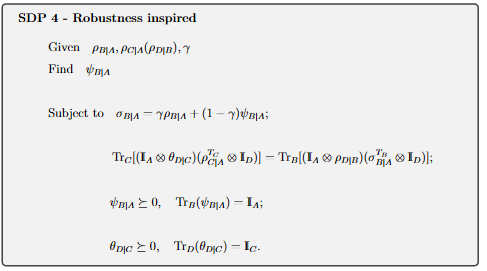

In [ ]:
def RobustnessInspiredSDP(choi_CG,choi_U_fixed,gamma, d_A, d_B, d_C, d_D):

    #Setting the SDP variables
    choi_Theta = cp.Variable((d_C * d_D, d_C * d_D), hermitian=True) # \in L(H_C ⊗ H_D})
    choi_J_resultant = cp.Variable((d_A * d_B, d_A * d_B), hermitian=True) # \in L(H_A ⊗ H_B})
    choi_psi_noise = cp.Variable((d_A * d_B, d_A * d_B), hermitian=True) # \in L(H_A ⊗ H_B})

    # Constraints
    constraints = []

    # 1. Convex combination constraint
    constraints.append(choi_J_resultant == gamma * choi_U_fixed + (1 - gamma) * choi_psi_noise)

    # 2. Commutation relation (without rho_A dependence) constraint
        # Computing the left hand side
    rho_ACD = cp.kron(np.eye(d_A),choi_Theta) @ cp.kron(cp.partial_transpose(choi_CG,dims=[d_A,d_C],axis =1),np.eye(d_D))
    lhs = cp.partial_trace(rho_ACD,dims=[d_A,d_C,d_D],axis=1) #Partial trace over C
        # Computing the right hand side
    rho_ABD = cp.kron(np.eye(d_A),choi_CG) @ cp.kron(cp.partial_transpose(choi_J_resultant,dims=[d_A,d_B],axis=1),np.eye(d_D))
    rhs = cp.partial_trace(rho_ABD,dims=[d_A,d_B,d_D],axis=1) #Partial trace over B

    # Appending the constraint on the constraints list
    constraints.append(lhs == rhs)

    # 3. Acausal conditional state of the noised unitary channel constraints
    constraints += [
       choi_psi_noise >> 0,
        cp.partial_trace(choi_psi_noise, dims=[d_A, d_B], axis=1) == np.eye(d_A)
    ]

    # 4. Acausal conditional state of the Gamma channel constraint
    constraints += [
        choi_Theta >> 0,
        cp.partial_trace(choi_Theta, dims=[d_C, d_D], axis=1) == np.eye(d_C)
    ]

    prob = cp.Problem(cp.Minimize(0), constraints) #Feasibility problem
    prob.solve(solver=cp.MOSEK, verbose=False)

    if prob.status == cp.OPTIMAL:
        return choi_Theta.value, choi_psi_noise.value,choi_J_resultant.value
    else:
        print("No feasible solution found.")
        return [0], [0],[0]

   #Conclusions:
   # 1 - For gamma = 0, choi_J_resultant == choi_U_feasible
   # 2 - For gamma = 1, choi_J_resultant == choi_U_swap
   # 3 - For   0<gamma <1, choi_J_resultant and choi_U_feasible represents new channels in which, setting the coarse-graining, the diagram commutes



#### Testing for the non compatible scenarios: 2,3 and 4

##### Setup 2: BnS and z-interaction channel

In [ ]:
if __name__ == "__main__":

    # Defining the number of rows and columns of the operators in each regions
    d_A = 4
    d_B = 4
    d_C = 2
    d_D = 2

    #Setting the convex combination parameter gamma
    cc_parameters = np.linspace(0,1,1500)

    #Defining the fixed Choi state of the coarse graining channel
    choi_CG_blur = calc_choi_CG(d_A,d_C,coarse_graining_blursatur)

    #Defining the fixed Choi state of the z-interaction channel
    choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t=1))

    #Saving the results
    found_noised_micro_dynamics_setup2 = []
    resultants_macro_dynamics_setup2 = []
    resultants_micro_dynamics_setup2 = []
    parameters_where_breaks_setup2 = []
    parameters_where_works_setup2 = []


    for gamma in cc_parameters:
        choi_Theta_resultants_macro, choi_psi_noise, choi_resultant_micro = RobustnessInspiredSDP(choi_CG_blur,choi_U_sigma,gamma, d_A, d_B, d_C, d_D)
        if len(choi_Theta_resultants_macro) == 1:
          print("The program breaks at gamma = {}".format(gamma))
          parameters_where_breaks_setup2.append(gamma)
          #continue
          break
        else:
          print("Saving the results for gamma={}".format(gamma))
          parameters_where_works_setup2.append(gamma)
          resultants_macro_dynamics_setup2.append(choi_Theta_resultants_macro)
          found_noised_micro_dynamics_setup2.append(choi_psi_noise)
          resultants_micro_dynamics_setup2.append(choi_resultant_micro)


Saving the results for gamma=0.0
Saving the results for gamma=0.00066711140760507
Saving the results for gamma=0.00133422281521014
Saving the results for gamma=0.00200133422281521
Saving the results for gamma=0.00266844563042028
Saving the results for gamma=0.00333555703802535
Saving the results for gamma=0.00400266844563042
Saving the results for gamma=0.00466977985323549
Saving the results for gamma=0.00533689126084056
Saving the results for gamma=0.00600400266844563
Saving the results for gamma=0.0066711140760507
Saving the results for gamma=0.00733822548365577
Saving the results for gamma=0.00800533689126084
Saving the results for gamma=0.00867244829886591
Saving the results for gamma=0.00933955970647098
Saving the results for gamma=0.01000667111407605
Saving the results for gamma=0.01067378252168112
Saving the results for gamma=0.011340893929286189
Saving the results for gamma=0.01200800533689126
Saving the results for gamma=0.01267511674449633
Saving the results for gamma=0.01334

In [ ]:
#Highest value where it works
max_gamma_setup2 = max(parameters_where_works_setup2)
print("Highest gamma-value where it works for Setup2: {}".format(max_gamma_setup2))

#Lowest value where it works
min_gamma_setup2 = min(parameters_where_works_setup2)
print("Lowest gamma-value where it works for Setup2: {}".format(min_gamma_setup2))

Highest gamma-value where it works for Setup2: 0.5570380253502334
Lowest gamma-value where it works for Setup2: 0.0


##### Setup 3: Partial trace and SWAP channel

In [ ]:

if __name__ == "__main__":

    # Defining the number of rows and columns of the operators in each regions
    d_A = 4
    d_B = 4
    d_C = 2
    d_D = 2

    #Setting the convex combination parameter gamma
    cc_parameters = np.linspace(0,1,1500)

    #Defining the fixed Choi state of the coarse graining partial trace
    choi_CG_trace = calc_choi_CG(d_A,d_C,coarse_graining_partial_trace_B)

    #Defining the fixed Choi state of the SWAP channel
    choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)

    #Saving the results
    found_noised_micro_dynamics_setup3 = []
    resultants_macro_dynamics_setup3 = []
    resultants_micro_dynamics_setup3 = []
    parameters_where_breaks_setup3 = []
    parameters_where_works_setup3 = []

    for gamma in cc_parameters:
        #Running the optimization program
        choi_Theta_resultants_macro, choi_psi_noise, choi_resultant_micro = RobustnessInspiredSDP(choi_CG_trace,choi_U_swap,gamma, d_A, d_B, d_C, d_D)

        if len(choi_Theta_resultants_macro) == 1:
          print("The program breaks at gamma = {}".format(gamma))
          parameters_where_breaks_setup3.append(gamma)
          #continue
          break
        else:
          print("Saving the results for gamma={}".format(gamma))
          parameters_where_works_setup3.append(gamma)
          resultants_macro_dynamics_setup3.append(choi_Theta_resultants_macro)
          found_noised_micro_dynamics_setup3.append(choi_psi_noise)
          resultants_micro_dynamics_setup3.append(choi_resultant_micro)


Saving the results for gamma=0.0
Saving the results for gamma=0.00066711140760507
Saving the results for gamma=0.00133422281521014
Saving the results for gamma=0.00200133422281521
Saving the results for gamma=0.00266844563042028
Saving the results for gamma=0.00333555703802535
Saving the results for gamma=0.00400266844563042
Saving the results for gamma=0.00466977985323549
Saving the results for gamma=0.00533689126084056
Saving the results for gamma=0.00600400266844563
Saving the results for gamma=0.0066711140760507
Saving the results for gamma=0.00733822548365577
Saving the results for gamma=0.00800533689126084
Saving the results for gamma=0.00867244829886591
Saving the results for gamma=0.00933955970647098
Saving the results for gamma=0.01000667111407605
Saving the results for gamma=0.01067378252168112
Saving the results for gamma=0.011340893929286189
Saving the results for gamma=0.01200800533689126
Saving the results for gamma=0.01267511674449633
Saving the results for gamma=0.01334

In [ ]:
#Highest value where it works
max_gamma_setup3 = max(parameters_where_works_setup3)
print("Highest gamma-value where it works for Setup3: {}".format(max_gamma_setup3))

#Lowest value where it works
min_gamma_setup3 = min(parameters_where_works_setup3)
print("Lowest gamma-value where it works for Setup3: {}".format(min_gamma_setup3))

Highest gamma-value where it works for Setup3: 0.24949966644429616
Lowest gamma-value where it works for Setup3: 0.0


##### Setup 4: Partial trace and z-interaction channel

In [ ]:

if __name__ == "__main__":

    # Defining the number of rows and columns of the operators in each regions
    d_A = 4
    d_B = 4
    d_C = 2
    d_D = 2

    #Setting the convex combination parameter gamma
    cc_parameters = np.linspace(0,1,1500)

    #Defining the fixed Choi state of the coarse graining partial trace
    choi_CG_trace = calc_choi_CG(d_A,d_C,coarse_graining_partial_trace_B)

    #Defining the fixed Choi state of the z-interaction channel
    choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t=1))

    #Saving the results
    found_noised_micro_dynamics_setup4 = []
    resultants_macro_dynamics_setup4 = []
    resultants_micro_dynamics_setup4 = []
    parameters_where_breaks_setup4 = []
    parameters_where_works_setup4 = []

    for gamma in cc_parameters:
        #Running the optimization program
        choi_Theta_resultants_macro, choi_psi_noise, choi_resultant_micro = RobustnessInspiredSDP(choi_CG_trace,choi_U_sigma,gamma, d_A, d_B, d_C, d_D)

        if len(choi_Theta_resultants_macro) == 1:
          print("The program breaks at gamma = {}".format(gamma))
          parameters_where_breaks_setup4.append(gamma)
          #continue
          break
        else:
          print("Saving the results for gamma={}".format(gamma))
          parameters_where_works_setup4.append(gamma)
          resultants_macro_dynamics_setup4.append(choi_Theta_resultants_macro)
          found_noised_micro_dynamics_setup4.append(choi_psi_noise)
          resultants_micro_dynamics_setup4.append(choi_resultant_micro)


Saving the results for gamma=0.0
Saving the results for gamma=0.00066711140760507
Saving the results for gamma=0.00133422281521014
Saving the results for gamma=0.00200133422281521
Saving the results for gamma=0.00266844563042028
Saving the results for gamma=0.00333555703802535
Saving the results for gamma=0.00400266844563042
Saving the results for gamma=0.00466977985323549
Saving the results for gamma=0.00533689126084056
Saving the results for gamma=0.00600400266844563
Saving the results for gamma=0.0066711140760507
Saving the results for gamma=0.00733822548365577
Saving the results for gamma=0.00800533689126084
Saving the results for gamma=0.00867244829886591
Saving the results for gamma=0.00933955970647098
Saving the results for gamma=0.01000667111407605
Saving the results for gamma=0.01067378252168112
Saving the results for gamma=0.011340893929286189
Saving the results for gamma=0.01200800533689126
Saving the results for gamma=0.01267511674449633
Saving the results for gamma=0.01334

In [ ]:
#Highest value where it works
max_gamma_setup4 = max(parameters_where_works_setup4)
print("Highest gamma-value where it works for Setup4: {}".format(max_gamma_setup4))

#Lowest value where it works
min_gamma_setup4 = min(parameters_where_works_setup4)
print("Lowest gamma-value where it works for Setup4: {}".format(min_gamma_setup4))

Highest gamma-value where it works for Setup4: 0.5236824549699799
Highest gamma-value where it works for Setup4: 0.0


##### Diamond norm computations

In [ ]:
#Setup 2
#Computing the diamond norm distance between the initial microscopic dynamics and the resultant
results_micro_distances_setup2 = []

for i in range(len(parameters_where_works_setup2)):
  print("Computing for parameter {} ...".format(parameters_where_works_setup2[i]))
  results_micro_distances_setup2.append(diamond_norm(Choi(resultants_micro_dynamics_setup2[i]) - Choi(choi_U_sigma)))


#Setup 3
#Computing the diamond norm distance between the initial microscopic dynamics and the resultant
results_micro_distances_setup3 = []

for i in range(len(parameters_where_works_setup3)):
  print("Computing for parameter {} ...".format(parameters_where_works_setup3[i]))
  results_micro_distances_setup3.append(diamond_norm(Choi(resultants_micro_dynamics_setup3[i]) - Choi(choi_U_swap)))

#Setup 4
#Computing the diamond norm distance between the initial microscopic dynamics and the resultant
results_micro_distances_setup4 = []

for i in range(len(parameters_where_works_setup4)):
  print("Computing for parameter {} ...".format(parameters_where_works_setup4[i]))
  results_micro_distances_setup4.append(diamond_norm(Choi(resultants_micro_dynamics_setup4[i]) - Choi(choi_U_sigma)))


Computing for parameter 0.0 ...
Computing for parameter 0.00066711140760507 ...
Computing for parameter 0.00133422281521014 ...
Computing for parameter 0.00200133422281521 ...
Computing for parameter 0.00266844563042028 ...
Computing for parameter 0.00333555703802535 ...
Computing for parameter 0.00400266844563042 ...
Computing for parameter 0.00466977985323549 ...
Computing for parameter 0.00533689126084056 ...
Computing for parameter 0.00600400266844563 ...
Computing for parameter 0.0066711140760507 ...
Computing for parameter 0.00733822548365577 ...
Computing for parameter 0.00800533689126084 ...
Computing for parameter 0.00867244829886591 ...
Computing for parameter 0.00933955970647098 ...
Computing for parameter 0.01000667111407605 ...
Computing for parameter 0.01067378252168112 ...
Computing for parameter 0.011340893929286189 ...
Computing for parameter 0.01200800533689126 ...
Computing for parameter 0.01267511674449633 ...
Computing for parameter 0.0133422281521014 ...
Computing

##### Graphs generation

###### Setup 2

<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3333207422.py:22: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$|| \mathcal{J}^t_{B|A} - \mathcal{U}^{\sigma_z}_{B|A} ||_{\diamond}$",fontsize=15)


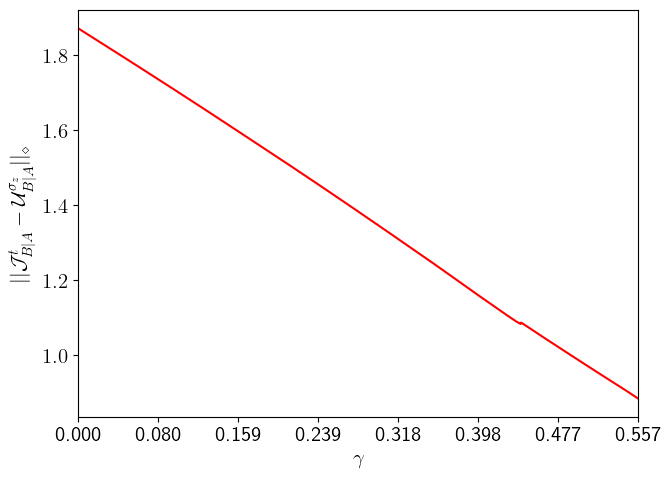

In [ ]:
#Generating the graph

plt.rcParams.update({'font.size': 15})


#Computing the diamond norm distance between the initial microscopic dynamics and the resultant

plt.plot(parameters_where_works_setup2,results_micro_distances_setup2, color ="r")
#plt.scatter(parameters_where_works_setup2,results_micro_distances_setup2,color= "r")

#plt.legend(loc='upper right', frameon = True, fancybox= True, shadow =True, ncol= 1, fontsize= 10)

plt.tight_layout()
plt.yscale("linear")
plt.xlabel("$\\gamma $",fontsize=15)


plt.xticks(np.linspace(0,max(parameters_where_works_setup2),8))
plt.xlim(0,max(parameters_where_works_setup2))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.ylabel("$|| \mathcal{J}^t_{B|A} - \mathcal{U}^{\sigma_z}_{B|A} ||_{\diamond}$",fontsize=15)
plt.savefig("/content/micro_distance_setup2.png",bbox_inches='tight')
plt.show()


###### Setup 3

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-146096556.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$|| \mathcal{J}^t_{B|A} - \mathcal{U}^{swap}_{B|A} ||_{\diamond}$",fontsize=15)


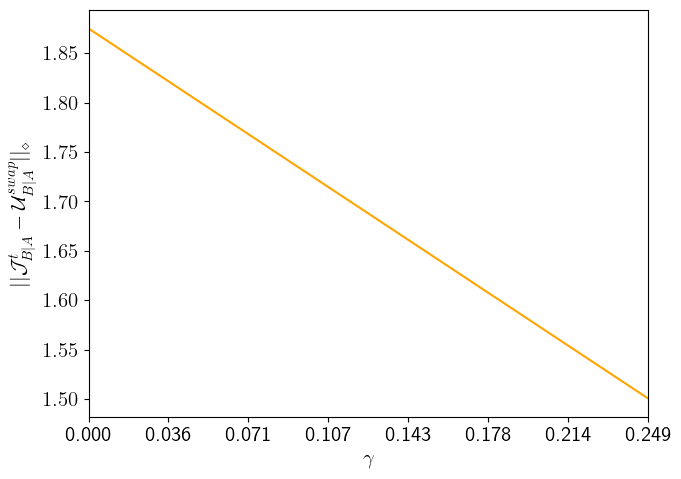

In [ ]:

plt.rcParams.update({'font.size': 15})


#Computing the diamond norm distance between the initial microscopic dynamics and the resultant

plt.plot(parameters_where_works_setup3,results_micro_distances_setup3, color ="orange")

#plt.legend(loc='upper right', frameon = True, fancybox= True, shadow =True, ncol= 1, fontsize= 10)
plt.tight_layout()
plt.yscale("linear")
plt.xlabel("$\\gamma $",fontsize=15)

plt.xticks(np.linspace(0,max(parameters_where_works_setup3),8))
plt.xlim(0,max(parameters_where_works_setup3))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.ylabel("$|| \mathcal{J}^t_{B|A} - \mathcal{U}^{swap}_{B|A} ||_{\diamond}$",fontsize=15)
plt.savefig("/content/micro_distance_setup3.png",bbox_inches='tight')
plt.show()

###### Setup 4

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3936305526.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$|| \mathcal{J}^t_{B|A} - \mathcal{U}^{\sigma_z}_{B|A} ||_{\diamond}$",fontsize=15)


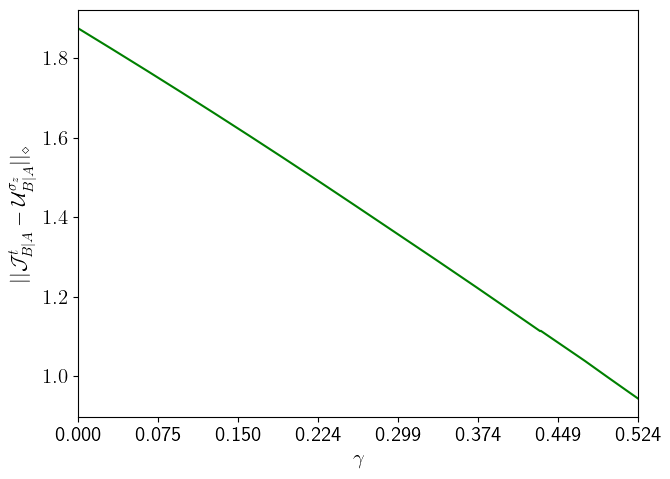

In [ ]:

plt.rcParams.update({'font.size': 15})


#Computing the diamond norm distance between the initial microscopic dynamics and the resultant

plt.plot(parameters_where_works_setup4,results_micro_distances_setup4, color ="g")

#plt.legend(loc='upper right', frameon = True, fancybox= True, shadow =True, ncol= 1, fontsize= 10)
plt.tight_layout()
plt.yscale("linear")
plt.xlabel("$\\gamma $",fontsize=15)

plt.xticks(np.linspace(0,max(parameters_where_works_setup4),8))
plt.xlim(0,max(parameters_where_works_setup4))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

#plt.yticks(np.linspace(0,2,8))
#plt.ylim(0,2)
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.ylabel("$|| \mathcal{J}^t_{B|A} - \mathcal{U}^{\sigma_z}_{B|A} ||_{\diamond}$",fontsize=15)
plt.savefig("/content/micro_distance_setup4.png",bbox_inches='tight')
plt.show()

##### Testing: Commutation relation

In [ ]:
#For the resultant dynamics in setup 2

resultant_micro_test = parameters_where_works_setup2[20]*choi_U_sigma + (1-parameters_where_works_setup2[20])*found_noised_micro_dynamics_setup2[20]
print("\nChecking manually the consistency of the convex combination. Diamond norm result:{}".format(diamond_norm(Choi(resultant_micro_test) - Choi(resultants_micro_dynamics_setup2[20]))))

rho_C = partial_trace(choi_CG_blur @ np.kron(rho_random.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
lhs = partial_trace(resultants_macro_dynamics_setup2[20] @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

rho_B = partial_trace(resultant_micro_test @ np.kron(rho_random.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
rhs = partial_trace(choi_CG_blur @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

#Computing the trace norm of lhs - rhs
tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=7))
print("Checkin manually the commutativy relation for a given state: {}".format(tr_norm))



Checking manually the consistency of the convex combination. Diamond norm result:1.2127590650728437e-18
Checkin manually the commutativy relation for a given state: 0.0


In [ ]:
#For the resultant dynamics in setup 3

resultant_micro_test = parameters_where_works_setup3[20]*choi_U_swap + (1-parameters_where_works_setup3[20])*found_noised_micro_dynamics_setup3[20]
print("\nChecking manually the consistency of the convex combination. Diamond norm result:{}".format(diamond_norm(Choi(resultant_micro_test) - Choi(resultants_micro_dynamics_setup3[20]))))

rho_C = partial_trace(choi_CG_trace @ np.kron(rho_ent.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
lhs = partial_trace(resultants_macro_dynamics_setup3[20] @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

rho_B = partial_trace(resultant_micro_test @ np.kron(rho_ent.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
rhs = partial_trace(choi_CG_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

#Computing the trace norm of lhs - rhs
tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=7))
print("Checkin manually the commutativy relation for a given state: {}".format(tr_norm))


Checking manually the consistency of the convex combination. Diamond norm result:3.600226733934883e-19
Checkin manually the commutativy relation for a given state: 0.0


In [ ]:
#For the resultant dynamics in setup 4

resultant_micro_test = parameters_where_works_setup4[20]*choi_U_sigma + (1-parameters_where_works_setup4[20])*found_noised_micro_dynamics_setup4[20]
print("\nChecking manually the consistency of the convex combination. Diamond norm result:{}".format(diamond_norm(Choi(resultant_micro_test) - Choi(resultants_micro_dynamics_setup4[20]))))

rho_C = partial_trace(choi_CG_trace @ np.kron(rho_mix.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
lhs = partial_trace(resultants_macro_dynamics_setup4[20] @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

rho_B = partial_trace(resultant_micro_test @ np.kron(rho_mix.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
rhs = partial_trace(choi_CG_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

#Computing the trace norm of lhs - rhs
tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=7))
print("Checkin manually the commutativy relation for a given state: {}".format(tr_norm))


Checking manually the consistency of the convex combination. Diamond norm result:8.792403058083607e-38
Checkin manually the commutativy relation for a given state: 0.0


#Benchmarking diagram commutativity

### Opening the results

In [ ]:

#Loading...
with open(r'C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Results pickles\Standardized\1e6 states\results_setup_1.pickle', 'rb') as handle:
    results_setup_1 = pickle.load(handle)

with open(r'C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Results pickles\Standardized\1e6 states\results_setup_2.pickle', 'rb') as handle:
    results_setup_2= pickle.load(handle)

with open(r'C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Results pickles\Standardized\1e6 states\results_setup_3.pickle', 'rb') as handle:
    results_setup_3 = pickle.load(handle)

with open(r'C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Results pickles\Standardized\1e6 states\results_setup_4.pickle', 'rb') as handle:
    results_setup_4 = pickle.load(handle)


### Random states processing

In [ ]:
d_C = 2
d_D = 2
d_A = 4
d_B = 4 #Number of rows and columns of the matrices that compose \mathcal{L}(\mathcal{H}_A)
N_random = 1000000

#Setting the Gamma-petz generators list
#generators = [rho_mix, rho_ent, rho_werner]
#generators_str = ["rho_MM", "rho_ME", "rho_werner"]
#generators_str_chart = ["$\\rho_{MM}$","$\\rho_{ME}$","$\\rho_{werner}(l=1/3)$"]

'''
#Generating the random density operators (standard way)
random_operators = []
for i in range(N_random):
    B = np.random.randint(10, size=(d_A, d_A))  + 1j * np.random.randint(10, size=(d_A, d_A))
    rho_rand = B @ B.conj().T
    rho_rand = (1/np.trace(rho_rand))*rho_rand
    random_operators.append(rho_rand)

#Saving the random operators
with open('random_operators{}.pickle'.format(N_random), 'wb') as file:
    pickle.dump(random_operators, file, protocol=pickle.HIGHEST_PROTOCOL)
'''

#Loading the random density operators
path = r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Random states\random_operators{}.pickle".format(N_random)
with open(path, 'rb') as handle:
    random_operators = pickle.load(handle)


'''
#Generating the random density operators using qutip

random_operators_qutip = []
for i in range(N_random):
  random_op = qp.rand_dm(d_A).full()
  random_operators_qutip.append(random_op)

#Saving the random operators
with open('random_qutip_operators10000.pickle', 'wb') as file:
    pickle.dump(random_operators_qutip, file, protocol=pickle.HIGHEST_PROTOCOL)



#Loading the qutip random density operators
with open('/content/random_qutip_operators10000.pickle', 'rb') as handle:
    random_operators_qutip = pickle.load(handle)


#Generating 10000 werner states

N_werner = np.linspace(0,1,10000)
werner_operators = []

for p in N_werner:
  rho_w = (p/6)* np.array([[2,0,0,0],[0,1,1,0],[0,1,1,0],[0,0,0,2]]) + ((1-p)/2)*np.array([[0,0,0,0],[0,1,-1,0], [0,-1,1,0],[0,0,0,0]])
  werner_operators.append(rho_w)
'''

#DONE
# - For each generator, generates the Gamma-petz and, for 10000 random states, calculate the trace norm of LHS - RHS and save the results in a list
# - For each setup, generate the same histograms, testing with the rho_werner, making the parameter p running 10000 values between 0 and 1
# - In the same chart, to plot the histogram for all generators (https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart)
# - Repeat this for all the four setups

"\n#Generating the random density operators using qutip\n\nrandom_operators_qutip = []\nfor i in range(N_random):\n  random_op = qp.rand_dm(d_A).full()\n  random_operators_qutip.append(random_op)\n\n#Saving the random operators\nwith open('random_qutip_operators10000.pickle', 'wb') as file:\n    pickle.dump(random_operators_qutip, file, protocol=pickle.HIGHEST_PROTOCOL)\n\n\n\n#Loading the qutip random density operators\nwith open('/content/random_qutip_operators10000.pickle', 'rb') as handle:\n    random_operators_qutip = pickle.load(handle)\n\n\n#Generating 10000 werner states\n\nN_werner = np.linspace(0,1,10000)\nwerner_operators = []\n\nfor p in N_werner:\n  rho_w = (p/6)* np.array([[2,0,0,0],[0,1,1,0],[0,1,1,0],[0,0,0,2]]) + ((1-p)/2)*np.array([[0,0,0,0],[0,1,-1,0], [0,-1,1,0],[0,0,0,0]])\n  werner_operators.append(rho_w)\n"

#### Random operators distribution

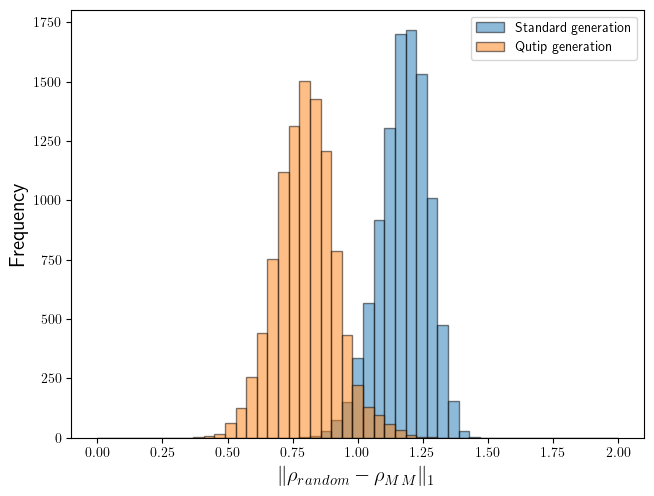

In [ ]:
distances_to_MM = []
distances_to_MM_qutip = []

for i in range(N_random):
  #Computing the distance of the random operators to the maximally mixed stated
  dist1 =  float(np.linalg.norm(random_operators[i] - rho_mix,ord='nuc').round(decimals=4))
  distances_to_MM.append(dist1)

  #Computing the distance of the qutip random operators to the maximally mixed stated
  dist2 =  float(np.linalg.norm(random_operators_qutip[i] - rho_mix,ord='nuc').round(decimals=4))
  distances_to_MM_qutip.append(dist2)


bins = np.linspace(0,2,50)
plt.rcParams['text.usetex'] = True
plt.hist(distances_to_MM,bins, alpha=0.5, label='Standard generation',edgecolor='black')
plt.hist(distances_to_MM_qutip, bins, alpha=0.5, label='Qutip generation',edgecolor='black')

plt.tight_layout()
plt.legend(loc="upper right")
plt.yscale("linear")
plt.ylabel("Frequency",fontsize=15)
plt.xlabel("$\| \\rho_{random} - \\rho_{MM} \|_{1}$",fontsize=15)
plt.savefig("hist_random_states10000.png",bbox_inches='tight')
plt.show()

## Graphs

###Colormaps

#### Scenario 1: Blurred and saturated detector + SWAP

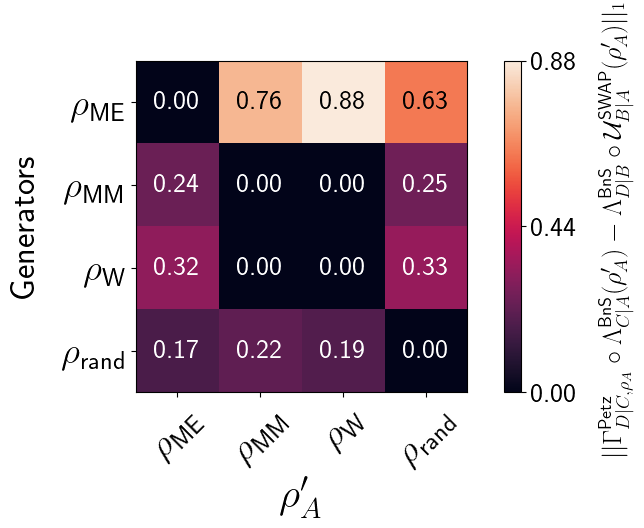

In [39]:


results_with_rhoA_setup1 = {}

for i in range(len(initial_states)):
    #Constructing the Choi states for a fixed rho_A
    rho_A_ctc = initial_states[i]
    choi_CG, choi_U, choi_Gamma_petz = define_all(d_A,d_B,d_C,d_D,rho_A_ctc, kraus_CG(), coarse_graining_blursatur, unitary_channel_swap)

    #Calculating the commutation relation for all states with the i-th rho_A constructor
    comm_dict = {}
    for j in range(len(initial_states)):
        rho_A_com = initial_states[j] #Setting the state rho'_A for to compute the commutation relation

        # Computing the left hand side
        rho_C = partial_trace(choi_CG @ cp.kron(rho_A_com.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_Gamma_petz @ cp.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

        # Computing the right hand side
        rho_B = partial_trace(choi_U @ cp.kron(rho_A_com.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG @ cp.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm of the difference between the left and the right side of the commutation relation for the rho'_A
        tr_norm = float(np.linalg.norm(lhs.value - rhs.value,ord='nuc').round(decimals=4))

        #Saving the result for each state rho'_A in the commutation relation
        comm_dict[initial_states_str[j]] = tr_norm
    #Saving the result for each initial state rho_A in the construction
    results_with_rhoA_setup1[initial_states_str[i]] = comm_dict
    del comm_dict

#Building a color map for the results with the constraint WITHOUT the rho_A

df_1 = pd.DataFrame.from_dict(results_with_rhoA_setup1, orient='index')



#Setting the color map's colors
custom_cmap = sns.color_palette("rocket", as_cmap=True)

# 2. Plot

#plt.figure(figsize=(6, 8))
im = plt.imshow(df_1, cmap=custom_cmap)

# 3. Set custom tick labels
#plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.xticks(ticks=np.arange(df_1.shape[1]), labels=["$\\rho_{\\text{ME}}$","$\\rho_{\\text{MM}}$","$\\rho_{\\text{W}}$","$\\rho_{\\text{rand}}$"], rotation=45, fontsize=27)
plt.yticks(ticks=np.arange(df_1.shape[0]), labels=["$\\rho_{\\text{ME}}$","$\\rho_{\\text{MM}}$","$\\rho_{\\text{W}}$","$\\rho_{\\text{rand}}$"], fontsize =27)

# 4. Add values inside each square
data = df_1.values
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
    # Choose white or black text depending on background brightness for better readability
        bg_color = im.cmap(im.norm(data[i, j]))
        brightness = 0.299 * bg_color[0] + 0.587 * bg_color[1] + 0.114 * bg_color[2]
        text_color = 'white' if brightness < 0.5 else 'black'

        plt.text(j, i, f"{data[i, j]:.2f}", ha='center', va='center', color=text_color, fontsize=20)


# 5. Colorbar customization
min_val = df_1.min().min()
max_val = df_1.max().max()
mean_val = (max_val + min_val) / 2
mean_all = df_1.mean().mean()

cbar = plt.colorbar(pad=0.08)

cbar.set_label(r"$|| \Gamma_{D|C,\rho_A}^{\text{Petz}} \circ \Lambda^{\text{BnS}}_{C|A} (\rho'_A) - \Lambda^{\text{BnS}}_{D|B} \circ \mathcal{U}^{\text{SWAP}}_{B|A}(\rho'_A) ||_{1}$", fontsize =19, labelpad=16)
cbar.set_ticks([min_val, mean_val, max_val])
cbar.set_ticklabels([f'{min_val:.2f}', f'{mean_val:.2f}', f'{max_val:.2f}'])

plt.tight_layout() # Avoid label clipping
plt.xlabel("$\\rho'_A$", fontsize = 30) #Legend for columns
plt.ylabel("Generators", fontsize = 25, labelpad=15)
plt.title(" ",pad=20)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Color maps\color_map_setup1.png", bbox_inches='tight')
plt.show()


#### Scenario 2: Blurred and saturated detector + $\mathcal{U}^{\sigma_z}$

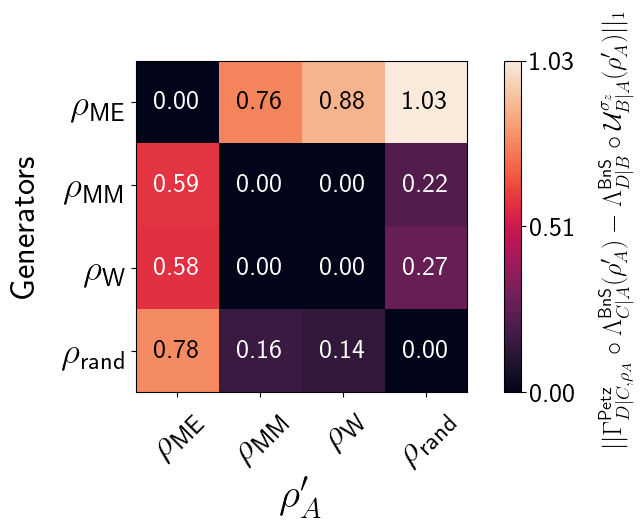

In [ ]:
results_with_rhoA_setup2 = {}
comm_dict = {}

for i in range(len(initial_states)):
    #Constructing the Choi states for a fixed rho_A
    rho_A_ctc = initial_states[i]
    choi_CG, choi_U, choi_Gamma_petz = define_all(d_A,d_B,d_C,d_D,rho_A_ctc, kraus_CG(), coarse_graining_blursatur,unitary_channel_sigma_z(), calc_type="act")


    #Calculating the commutation relation for all states with the i-th rho_A constructor
    del comm_dict
    comm_dict = {}
    for j in range(len(initial_states)):
        rho_A_com = initial_states[j] #Setting the state rho'_A for to compute the commutation relation

        # Computing the left hand side
        rho_C = partial_trace(choi_CG @ cp.kron(rho_A_com.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_Gamma_petz @ cp.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

        # Computing the right hand side
        rho_B = partial_trace(choi_U @ cp.kron(rho_A_com.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG @ cp.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm of the difference between the left and the right side of the commutation relation for the rho'_A
        tr_norm = float(np.linalg.norm(lhs.value - rhs.value,ord='nuc').round(decimals=4))

        #Saving the result for each state rho'_A in the commutation relation
        comm_dict[initial_states_str[j]] = tr_norm

    #Saving the result for each initial state rho_A in the construction
    results_with_rhoA_setup2[initial_states_str[i]] = comm_dict

#Building a color map for the results with the constraint WITHOUT the rho_A

df_2 = pd.DataFrame.from_dict(results_with_rhoA_setup2, orient='index')

# 1. Create custom colormap

#Setting the color map's colors
custom_cmap = sns.color_palette("rocket", as_cmap=True)

# 2. Plot

#plt.figure(figsize=(6, 8))
im = plt.imshow(df_2, cmap=custom_cmap)

# 3. Set custom tick labels
#plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.xticks(ticks=np.arange(df_2.shape[1]), labels=["$\\rho_{\\text{ME}}$","$\\rho_{\\text{MM}}$","$\\rho_{\\text{W}}$","$\\rho_{\\text{rand}}$"], rotation=45, fontsize=27)
plt.yticks(ticks=np.arange(df_2.shape[0]), labels=["$\\rho_{\\text{ME}}$","$\\rho_{\\text{MM}}$","$\\rho_{\\text{W}}$","$\\rho_{\\text{rand}}$"], fontsize =27)

# 4. Add values inside each square
data = df_2.values
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
    # Choose white or black text depending on background brightness for better readability
        bg_color = im.cmap(im.norm(data[i, j]))
        brightness = 0.299 * bg_color[0] + 0.587 * bg_color[1] + 0.114 * bg_color[2]
        text_color = 'white' if brightness < 0.5 else 'black'

        plt.text(j, i, f"{data[i, j]:.2f}", ha='center', va='center', color=text_color, fontsize=20)


# 5. Colorbar customization
min_val = df_2.min().min()
max_val = df_2.max().max()
mean_val = (max_val + min_val) / 2
mean_all = df_2.mean().mean()


cbar = plt.colorbar(pad=0.08)

cbar.set_label(r"$||\Gamma_{D|C,\rho_A}^{\text{Petz}} \circ \Lambda^{\text{BnS}}_{C|A} (\rho'_A) - \Lambda^{\text{BnS}}_{D|B} \circ \mathcal{U}^{\sigma_z}_{B|A}(\rho'_A) ||_{1}$", fontsize =19,labelpad=16)
cbar.set_ticks([min_val, mean_val, max_val])
cbar.set_ticklabels([f'{min_val:.2f}', f'{mean_val:.2f}', f'{max_val:.2f}'])

plt.tight_layout() # Avoid label clipping
plt.xlabel("$\\rho'_A$", fontsize = 30) #Legend for columns
plt.ylabel("Generators", fontsize = 25, labelpad=15)
plt.title(" ",pad=20)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Color maps\color_map_setup2.png", bbox_inches='tight')
plt.show()

#### Scenario 3: Partial trace + SWAP

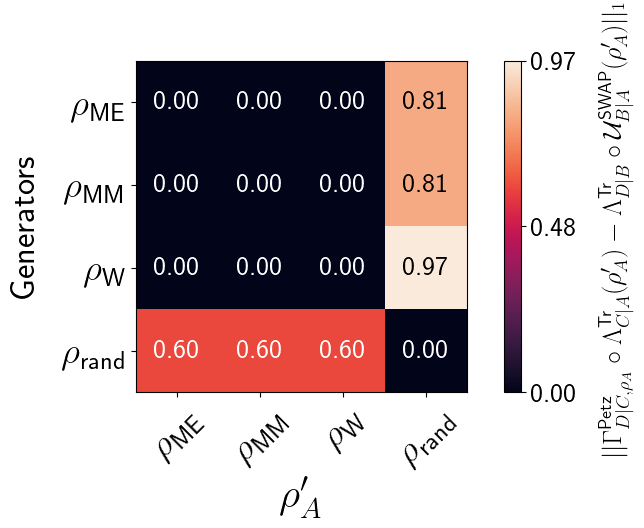

In [ ]:

results_with_rhoA_setup3 = {}

for i in range(len(initial_states)):
    #Constructing the Choi states for a fixed rho_A
    rho_A_ctc = initial_states[i]
    choi_CG, choi_U, choi_Gamma_petz = define_all(d_A,d_B,d_C,d_D,rho_A_ctc, kraus_partial_trace_B(), coarse_graining_partial_trace_B, unitary_channel_swap, calc_type="act")

    #Calculating the commutation relation for all states with the i-th rho_A constructor
    comm_dict = {}
    for j in range(len(initial_states)):
        rho_A_com = initial_states[j] #Setting the state rho'_A for to compute the commutation relation

        # Computing the left hand side
        rho_C = partial_trace(choi_CG @ cp.kron(rho_A_com.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_Gamma_petz @ cp.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

        # Computing the right hand side
        rho_B = partial_trace(choi_U @ cp.kron(rho_A_com.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG @ cp.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm of the difference between the left and the right side of the commutation relation for the rho'_A
        tr_norm = float(np.linalg.norm(lhs.value - rhs.value,ord='nuc').round(decimals=4))

        #Saving the result for each state rho'_A in the commutation relation
        comm_dict[initial_states_str[j]] = tr_norm

    #Saving the result for each initial state rho_A in the construction
    results_with_rhoA_setup3[initial_states_str[i]] = comm_dict
    del comm_dict

#Building a color map for the results with the constraint WITHOUT the rho_A

df_3 = pd.DataFrame.from_dict(results_with_rhoA_setup3, orient='index')

# 1. Create custom colormap
custom_cmap = sns.color_palette("rocket", as_cmap=True)

# 2. Plot

#plt.figure(figsize=(6, 8))
#plt.figure(figsize=(7, 8), constrained_layout=True)
im = plt.imshow(df_3, cmap=custom_cmap)

# 3. Set custom tick labels
#plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.xticks(ticks=np.arange(df_3.shape[1]), labels=["$\\rho_{\\text{ME}}$","$\\rho_{\\text{MM}}$","$\\rho_{\\text{W}}$","$\\rho_{\\text{rand}}$"], rotation=45, fontsize=27)
plt.yticks(ticks=np.arange(df_3.shape[0]), labels=["$\\rho_{\\text{ME}}$","$\\rho_{\\text{MM}}$","$\\rho_{\\text{W}}$","$\\rho_{\\text{rand}}$"], fontsize =27)

# 4. Add values inside each square
data = df_3.values
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
    # Choose white or black text depending on background brightness for better readability
        bg_color = im.cmap(im.norm(data[i, j]))
        brightness = 0.299 * bg_color[0] + 0.587 * bg_color[1] + 0.114 * bg_color[2]
        text_color = 'white' if brightness < 0.5 else 'black'

        plt.text(j, i, f"{data[i, j]:.2f}", ha='center', va='center', color=text_color, fontsize=20)


# 5. Colorbar customization
min_val = df_3.min().min()
max_val = df_3.max().max()
mean_val = (max_val + min_val) / 2
mean_all = df_3.mean().mean()

cbar = plt.colorbar(pad=0.08)

cbar.set_label(r"$|| \Gamma_{D|C,\rho_A}^{\text{Petz}} \circ \Lambda^{\text{Tr}}_{C|A} (\rho'_A) - \Lambda^{\text{Tr}}_{D|B} \circ \mathcal{U}^{\text{SWAP}}_{B|A}(\rho'_A) ||_{1}$", fontsize =19, labelpad=16)
cbar.set_ticks([min_val, mean_val, max_val])
cbar.set_ticklabels([f'{min_val:.2f}', f'{mean_val:.2f}', f'{max_val:.2f}'])

plt.tight_layout() # Avoid label clipping
plt.xlabel("$\\rho'_A$", fontsize = 30) #Legend for columns
plt.ylabel("Generators", fontsize = 25, labelpad=15)
plt.title(" ",pad=20)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Color maps\color_map_setup3.png", bbox_inches='tight')
plt.show()

#### Scenario 4: Partial trace + $\mathcal{U}^{\sigma_z}$

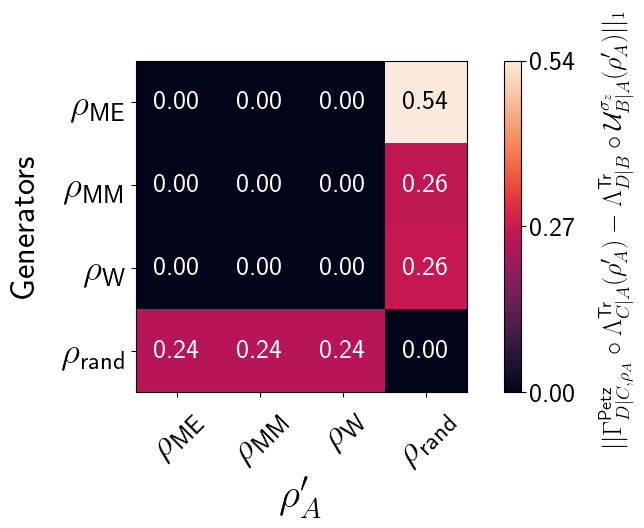

In [ ]:
results_with_rhoA_setup4 = {}
comm_dict = {}

for i in range(len(initial_states)):
    #Constructing the Choi states for a fixed rho_A
    rho_A_ctc = initial_states[i]
    choi_CG, choi_U, choi_Gamma_petz = define_all(d_A,d_B,d_C,d_D,rho_A_ctc, kraus_partial_trace_B(), coarse_graining_partial_trace_B,unitary_channel_sigma_z(), calc_type="act")


    #Calculating the commutation relation for all states with the i-th rho_A constructor
    del comm_dict
    comm_dict = {}
    for j in range(len(initial_states)):
        rho_A_com = initial_states[j] #Setting the state rho'_A for to compute the commutation relation

        # Computing the left hand side
        rho_C = partial_trace(choi_CG @ cp.kron(rho_A_com.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_Gamma_petz @ cp.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

        # Computing the right hand side
        rho_B = partial_trace(choi_U @ cp.kron(rho_A_com.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG @ cp.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm of the difference between the left and the right side of the commutation relation for the rho'_A
        tr_norm = float(np.linalg.norm(lhs.value - rhs.value,ord='nuc').round(decimals=4))

        #Saving the result for each state rho'_A in the commutation relation
        comm_dict[initial_states_str[j]] = tr_norm

    #Saving the result for each initial state rho_A in the construction
    results_with_rhoA_setup4[initial_states_str[i]] = comm_dict

#Building a color map for the results with the constraint WITHOUT the rho_A

df_4 = pd.DataFrame.from_dict(results_with_rhoA_setup4, orient='index')

# 1. Create custom colormap
custom_cmap = sns.color_palette("rocket", as_cmap=True)


# 2. Plot

im = plt.imshow(df_4, cmap=custom_cmap)

# 3. Set custom tick labels
#plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.xticks(ticks=np.arange(df_4.shape[1]), labels=["$\\rho_{\\text{ME}}$","$\\rho_{\\text{MM}}$","$\\rho_{\\text{W}}$","$\\rho_{\\text{rand}}$"], rotation=45, fontsize=27)
plt.yticks(ticks=np.arange(df_4.shape[0]), labels=["$\\rho_{\\text{ME}}$","$\\rho_{\\text{MM}}$","$\\rho_{\\text{W}}$","$\\rho_{\\text{rand}}$"], fontsize =27)

# 4. Add values inside each square
data = df_4.values
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
    # Choose white or black text depending on background brightness for better readability
        bg_color = im.cmap(im.norm(data[i, j]))
        brightness = 0.299 * bg_color[0] + 0.587 * bg_color[1] + 0.114 * bg_color[2]
        text_color = 'white' if brightness < 0.5 else 'black'

        plt.text(j, i, f"{data[i, j]:.2f}", ha='center', va='center', color=text_color, fontsize=20)


# 5. Colorbar customization
min_val = df_4.min().min()
max_val = df_4.max().max()
mean_val = (max_val + min_val) / 2
mean_all = df_4.mean().mean()

cbar = plt.colorbar(pad=0.08)

cbar.set_label(r"$|| \Gamma_{D|C,\rho_A}^{\text{Petz}} \circ \Lambda^{\text{Tr}}_{C|A} (\rho'_A) - \Lambda^{\text{Tr}}_{D|B} \circ \mathcal{U}^{\sigma_z}_{B|A}(\rho'_A) ||_{1}$", fontsize =19, labelpad=16)
cbar.set_ticks([min_val, mean_val, max_val])
cbar.set_ticklabels([f'{min_val:.2f}', f'{mean_val:.2f}', f'{max_val:.2f}'])

plt.tight_layout() # Avoid label clipping
plt.xlabel("$\\rho'_A$", fontsize = 30) #Legend for columns
plt.ylabel("Generators", fontsize = 25, labelpad=15)
plt.title(" ",pad=20)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Color maps\color_map_setup4.png", bbox_inches='tight')
plt.show()

### Histograms

#### Scenario 1: Blurred and saturated detector + SWAP

In [ ]:
%%time
results_setup_1 = {}
choi_CG_blursatur = calc_choi_CG(d_A, d_C,coarse_graining_blursatur)
choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)

for k in range(len(generators)):
  print("Calculating for the generator: {} ...".format(generators_str[k]))
  results_setup_1_gen = []
  #Setting the recovery map
  recovery_map = petz_recovery_map(generators[k], kraus_CG())
  #Generating the choi gamma Petz
  choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_blursatur,unitary_channel_swap)

  for i in range(len(random_operators)):
    #Setting the random density operator
    rho_rand = random_operators[i]

    #Calculating the commutation relation
    rho_C = partial_trace(choi_CG_blursatur @ np.kron(rho_rand.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
    lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

    rho_B = partial_trace(choi_U_swap @ np.kron(rho_rand.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
    rhs = partial_trace(choi_CG_blursatur @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

    #Computing the trace norm of lhs - rhs
    tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=4))
    results_setup_1_gen.append(tr_norm) #Saving the result for each rho_rand

  results_setup_1[generators_str[k]] = results_setup_1_gen #Saving the result for each generator

Calculating for the generator: rho_MM ...
CPU times: total: 6min 13s
Wall time: 6min 23s


KeyboardInterrupt: 

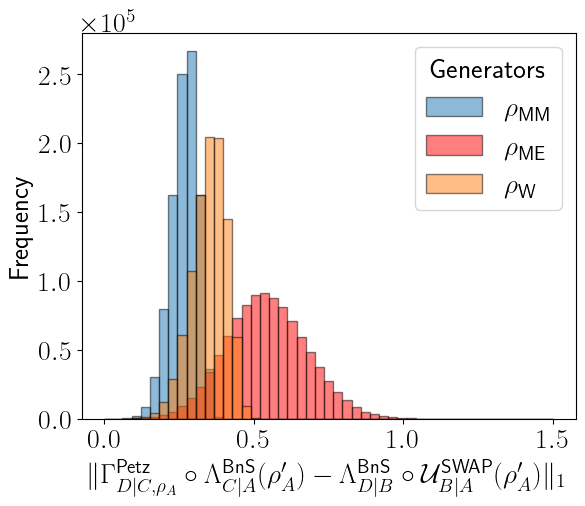

In [ ]:
#Plotting the histogram
bins = np.linspace(0,1.5,50)

plt.rcParams.update({'font.size': 20})
plt.rcParams['text.usetex'] = True
plt.hist(results_setup_1['rho_MM'],bins, alpha=0.5, label='$\\rho_{\\text{MM}}$',edgecolor='black')
plt.hist(results_setup_1['rho_ME'],bins, alpha=0.5, label='$\\rho_{\\text{ME}}$',edgecolor='black', color="red")
plt.hist(results_setup_1['rho_werner'],bins, alpha=0.5, label = '$\\rho_{\\text{W}}$',edgecolor='black')
plt.tight_layout()
plt.legend(loc="upper right", title= "Generators")
plt.yscale("linear")
plt.gca().yaxis.set_major_formatter(fmt)
plt.ylabel("Frequency",fontsize=19)
plt.xlabel(r"$\| \Gamma_{D|C, \rho_A}^{\text{Petz}} \circ \Lambda^{\text{BnS}}_{C|A} (\rho'_A) - \Lambda^{\text{BnS}}_{D|B} \circ \mathcal{U}^{\text{SWAP}}_{B|A}(\rho'_A) \|_{1}$",fontsize=20)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Hists standardized\1000000 states\hist_setup_1.png",bbox_inches='tight')
plt.show()


#### Scenario 2: Blurred and saturated detector + $\mathcal{U}^{\sigma_z}$

In [ ]:
%%time

results_setup_2 = {}
choi_CG_blursatur = calc_choi_CG(d_A, d_C,coarse_graining_blursatur)
choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z())

for k in range(len(generators)):
  print("Calculating for the generator: {} ...".format(generators_str[k]))
  results_setup_2_gen = []
  #Setting the recovery map
  recovery_map = petz_recovery_map(generators[k], kraus_CG())
  #Generating the choi gamma Petz
  choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_blursatur,unitary_channel_sigma_z())

  for i in range(len(random_operators)):
    #Setting the random density operator
    rho_rand = random_operators[i]

    #Calculating the commutation relation
    rho_C = partial_trace(choi_CG_blursatur @ np.kron(rho_rand.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
    lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
    rho_B = partial_trace(choi_U_sigma @ np.kron(rho_rand.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
    rhs = partial_trace(choi_CG_blursatur @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

    #Computing the trace norm of lhs - rhs
    tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=4))
    results_setup_2_gen.append(tr_norm) #Saving the result for each rho_rand

  results_setup_2[generators_str[k]] = results_setup_2_gen #Saving the result for each generator


NameError: name 'generators' is not defined

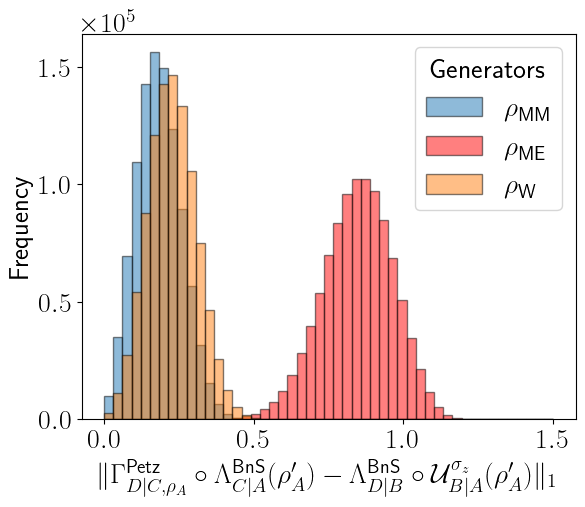

In [ ]:
#Plotting the histogram

plt.rcParams.update({'font.size': 20})
bins = np.linspace(0,1.5,50)
plt.rcParams['text.usetex'] = True
plt.hist(results_setup_2['rho_MM'],bins, alpha=0.5, label='$\\rho_{\\text{MM}}$',edgecolor='black')
plt.hist(results_setup_2['rho_ME'],bins, alpha=0.5, label='$\\rho_{\\text{ME}}$',edgecolor='black',color="red")
plt.hist(results_setup_2['rho_werner'],bins, alpha=0.5, label = '$\\rho_{\\text{W}}$',edgecolor='black')
plt.tight_layout()
plt.legend(loc="upper right", title= "Generators")
plt.yscale("linear")
plt.gca().yaxis.set_major_formatter(fmt)
plt.ylabel("Frequency",fontsize=19)
plt.xlabel(r"$\| \Gamma_{D|C,\rho_A}^{\text{Petz}} \circ \Lambda^{\text{BnS}}_{C|A} (\rho'_A) - \Lambda^{\text{BnS}}_{D|B} \circ \mathcal{U}^{\sigma_z}_{B|A}(\rho'_A) \|_{1}$",fontsize=20)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Hists standardized\1000000 states\hist_setup_2.png",bbox_inches='tight')
plt.show()


In [ ]:
print(max(results_setup_2['rho_ME']))
print(max(results_setup_2['rho_MM']))
print(max(results_setup_2['rho_werner']))

1.2493
0.5333
0.5892


#### Scenario 3: Partial trace + SWAP

In [ ]:
%%time
results_setup_3 = {}
choi_CG_trace =  calc_choi_CG(d_A,d_C, coarse_graining_partial_trace_B)
choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)

for k in range(len(generators)):
  print("Calculating for the generator: {} ...".format(generators_str[k]))
  results_setup_3_gen = []
  #Setting the recovery map
  recovery_map = petz_recovery_map(generators[k], kraus_partial_trace_B())
  #Generating the choi gamma Petz
  choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_swap)

  for i in range(len(random_operators)):
    #Setting the random density operator
    rho_rand = random_operators[i]

    #Calculating the commutation relation
    rho_C = partial_trace(choi_CG_trace @ np.kron(rho_rand.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
    lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
    rho_B = partial_trace(choi_U_swap @ np.kron(rho_rand.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
    rhs = partial_trace(choi_CG_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

    #Computing the trace norm of lhs - rhs
    tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=4))
    results_setup_3_gen.append(tr_norm) #Saving the result for each rho_rand

  results_setup_3[generators_str[k]] = results_setup_3_gen #Saving the result for each generator


Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_test ...
Calculating for the generator: rho_werner ...
CPU times: total: 53min 32s
Wall time: 54min 20s


In [ ]:
#Checking  consistency

choi_CG_trace =  calc_choi_CG(d_A,d_C, coarse_graining_partial_trace_B)
choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)

recovery_map_MM = petz_recovery_map(initial_states[0], kraus_partial_trace_B())
choi_gamma_Petz_MM = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map_MM,coarse_graining_partial_trace_B,unitary_channel_swap)

recovery_map_ME = petz_recovery_map(initial_states[1], kraus_partial_trace_B())
choi_gamma_Petz_ME = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map_ME,coarse_graining_partial_trace_B,unitary_channel_swap)

choi_gamma_Petz_ME == choi_gamma_Petz_MM


array([[False,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True, False,  True],
       [ True,  True,  True, False]])

In [ ]:
rho_A =  rho_ent
dim_A = rho_A.shape[0]
dim_C = kraus_partial_trace_B()[0].shape[0] #As kraus_CG is composed by (2x4) matrices, dim_C =2, as it should!

# Compute rho_C = E_C|A(rho_A) = sum_i K_i rho_A K_i^†
rho_C = sum(K @ rho_A @ K.conj().T for K in kraus_partial_trace_B())

# Compute the square roots and inverse square roots
sqrt_rho_A = fractional_matrix_power(rho_A, 0.5)
inv_sqrt_rho_C = fractional_matrix_power(rho_C, -0.5)

# Pre-compute the adjoint Kraus operators for the recovery map
adjoint_kraus_ME = [sqrt_rho_A @ K.conj().T @ inv_sqrt_rho_C for K in kraus_partial_trace_B()] #\rho_A^{1/2} K^{\dagger}(\rho_b^{-1/2})


In [ ]:
rho_A =  rho_mix
dim_A = rho_A.shape[0]
dim_C = kraus_partial_trace_B()[0].shape[0] #As kraus_CG is composed by (2x4) matrices, dim_C =2, as it should!

# Compute rho_C = E_C|A(rho_A) = sum_i K_i rho_A K_i^†
rho_C = sum(K @ rho_A @ K.conj().T for K in kraus_partial_trace_B())

# Compute the square roots and inverse square roots
sqrt_rho_A = fractional_matrix_power(rho_A, 0.5)
inv_sqrt_rho_C = fractional_matrix_power(rho_C, -0.5)

# Pre-compute the adjoint Kraus operators for the recovery map
adjoint_kraus_MM = [sqrt_rho_A @ K.conj().T @ inv_sqrt_rho_C for K in kraus_partial_trace_B()] #\rho_A^{1/2} K^{\dagger}(\rho_b^{-1/2})


In [ ]:
adjoint_kraus_MM[0][0][0]

np.float64(0.7071067811865476)

In [ ]:
adjoint_kraus_ME[0][0][0]

np.float64(0.7071067886371285)

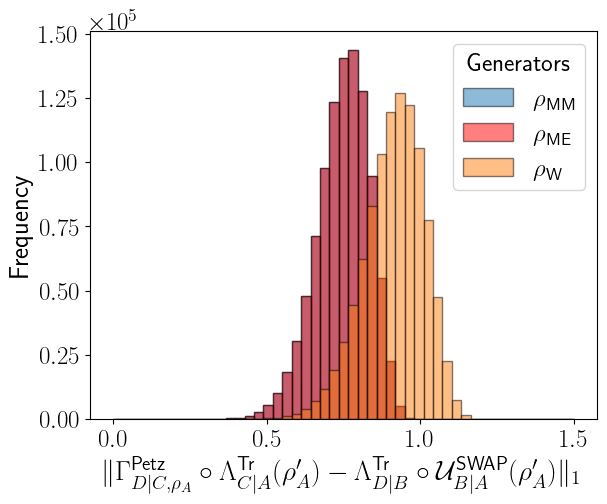

In [ ]:
#Plotting the histogram
plt.rcParams.update({'font.size': 18})
bins = np.linspace(0,1.5,50)
plt.rcParams['text.usetex'] = True
plt.hist(results_setup_3['rho_MM'], bins, alpha=0.5, label='$\\rho_{\\text{MM}}$',edgecolor='black',)
plt.hist(results_setup_3['rho_ME'], bins, alpha=0.5, label='$\\rho_{\\text{ME}}$', edgecolor="black", color = "red")
plt.hist(results_setup_3['rho_werner'], bins, alpha=0.5, label = '$\\rho_{\\text{W}}$',edgecolor='black')
plt.tight_layout()
plt.legend(loc="upper right", title= "Generators")
plt.yscale("linear")
plt.gca().yaxis.set_major_formatter(fmt)
plt.ylabel("Frequency",fontsize=19)
plt.xlabel(r"$\| \Gamma_{D|C, \rho_A}^{\text{Petz}} \circ \Lambda^{\text{Tr}}_{C|A} (\rho'_A) - \Lambda^{\text{Tr}}_{D|B} \circ \mathcal{U}^{\text{SWAP}}_{B|A}(\rho'_A) \|_{1}$",fontsize=20)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Hists standardized\1000000 states\hist_setup_3.png",bbox_inches='tight')
plt.show()

In [ ]:
sorted(results_setup_3['rho_werner'])

#### Scenario 4: Partial trace + $\mathcal{U}^{\sigma_z}$

In [ ]:
%%time
results_setup_4 = {}
choi_CG_trace = calc_choi_CG(d_A, d_C,coarse_graining_partial_trace_B)
choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z())

for k in range(len(generators)):
  print("Calculating for the generator: {} ...".format(generators_str[k]))
  results_setup_4_gen = []
  #Setting the recovery map
  recovery_map = petz_recovery_map(generators[k], kraus_partial_trace_B())
  #Generating the choi gamma Petz
  choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_sigma_z())

  for i in range(len(random_operators)):
    #Setting the random density operator
    rho_rand = random_operators[i]

    #Calculating the commutation relation
    rho_C = partial_trace(choi_CG_trace @ np.kron(rho_rand.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
    lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
    rho_B = partial_trace(choi_U_sigma @ np.kron(rho_rand.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
    rhs = partial_trace(choi_CG_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

    #Computing the trace norm of lhs - rhs
    tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=4))
    results_setup_4_gen.append(tr_norm) #Saving the result for each rho_rand

  results_setup_4[generators_str[k]] = results_setup_4_gen #Saving the result for each generator


Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_test ...
Calculating for the generator: rho_werner ...
CPU times: total: 53min 33s
Wall time: 54min 40s


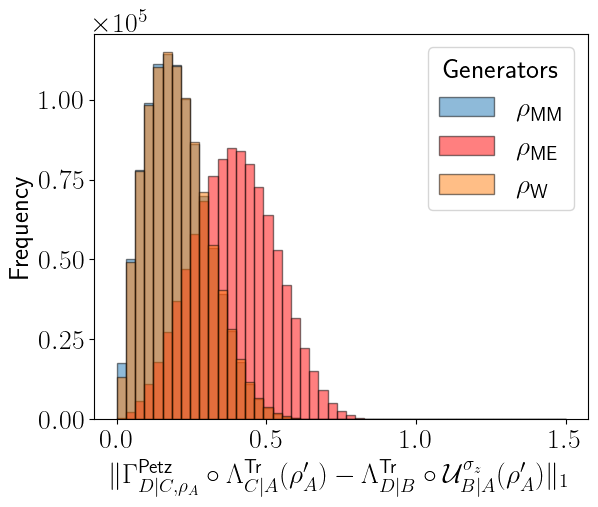

In [ ]:
#Plotting the histogram

plt.rcParams.update({'font.size': 20})
bins = np.linspace(0,1.5,50)
plt.rcParams['text.usetex'] = True
plt.hist(results_setup_4['rho_MM'],bins, alpha=0.5, label='$\\rho_{\\text{MM}}$',edgecolor='black')
plt.hist(results_setup_4['rho_ME'],bins, alpha=0.5, label='$\\rho_{\\text{ME}}$',edgecolor='black', color="red")
plt.hist(results_setup_4['rho_werner'],bins, alpha=0.5, label = '$\\rho_{\\text{W}}$',edgecolor='black')
plt.tight_layout()
plt.legend(loc="upper right", title= "Generators")
plt.yscale("linear")
plt.gca().yaxis.set_major_formatter(fmt)
plt.ylabel("Frequency",fontsize=19)
plt.xlabel(r"$\| \Gamma_{D|C, \rho_A}^{\text{Petz}} \circ \Lambda^{\text{Tr}}_{C|A} (\rho'_A) - \Lambda^{\text{Tr}}_{D|B} \circ \mathcal{U}^{\sigma_z}_{B|A}(\rho'_A) \|_{1}$",fontsize=20)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Hists standardized\1000000 states\hist_setup_4.png",bbox_inches='tight')
plt.show()

In [ ]:
print(max(results_setup_4['rho_ME']))
print(max(results_setup_4['rho_MM']))
print(max(results_setup_4['rho_werner']))

0.9024
0.7709
0.7683


### Changing the time in $\mathcal{U}^{\sigma_z}$

#### Calculating over the mean

In [ ]:
#Setting the number of random operators used to generate the results.
N_random = 1000000

#Setting the time interval
t_interval = np.linspace(0,20,40)


In [ ]:
#Opening the results
with open('/content/results_setup_2_all_time.pickle', 'rb') as handle:
    results_setup_2_all_time = pickle.load(handle)

with open('/content/results_setup_4_all_time.pickle', 'rb') as handle:
    results_setup_4_all_time = pickle.load(handle)


FileNotFoundError: [Errno 2] No such file or directory: '/content/results_setup_2_all_time.pickle'

##### Setup 2: Blurred and saturated detector + $\mathcal{U}^{\sigma_z}$

In [ ]:
%%time

results_setup_2_all_time ={}
choi_CG_blursatur = calc_choi_CG(d_A, d_C,coarse_graining_blursatur)

for t in t_interval:
  print("\nt = {}".format(t))
  results_setup_2_changing_t = {}

  for k in range(len(generators)):
    print("Calculating for the generator: {} ...".format(generators_str[k]))
    results_setup_2_changing_t_gen = []

    #Setting the unitary channel at time t
    choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t))
    #Setting the recovery map
    recovery_map = petz_recovery_map(generators[k], kraus_CG())
    #Generating the choi gamma Petz
    choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_blursatur,unitary_channel_sigma_z(t))

    for i in range(N_random):
      #Setting the random density operator
      rho_rand = random_operators[i]

      #Calculating the commutation relation
      rho_C = partial_trace(choi_CG_blursatur @ np.kron(rho_rand.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
      lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
      rho_B = partial_trace(choi_U_sigma @ np.kron(rho_rand.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
      rhs = partial_trace(choi_CG_blursatur @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

      #Computing the trace norm of lhs - rhs
      tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=4))
      results_setup_2_changing_t_gen.append(tr_norm) #Saving the result for each rho_rand

    results_setup_2_changing_t[generators_str[k]] = results_setup_2_changing_t_gen #Saving the result for each generator at a given time

  results_setup_2_all_time['t={}'.format(t)] = results_setup_2_changing_t #Saving the results of all generators at a given time



t = 0.0
Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_werner ...

t = 0.5128205128205128
Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_werner ...

t = 1.0256410256410255
Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_werner ...

t = 1.5384615384615383
Calculating for the generator: rho_MM ...
CPU times: total: 2h 12min 38s
Wall time: 2h 19min 36s


KeyboardInterrupt: 

In [ ]:
#Generating statistics from the results
mean_setup_2_all_time = {}
std_setup_2_all_time = {}

for gen in generators_str:
  #Initializing the dictionary values
  mean_setup_2_all_time[gen] = []
  std_setup_2_all_time[gen] = []

  for t in t_interval:
    #Saving the mean of the results for each t
    mean_setup_2_all_time[gen].append(float(np.mean(results_setup_2_all_time['t={}'.format(t)][gen])))

    #Saving the std of the results for each t
    std_setup_2_all_time[gen].append(float(np.std(results_setup_2_all_time['t={}'.format(t)][gen])))


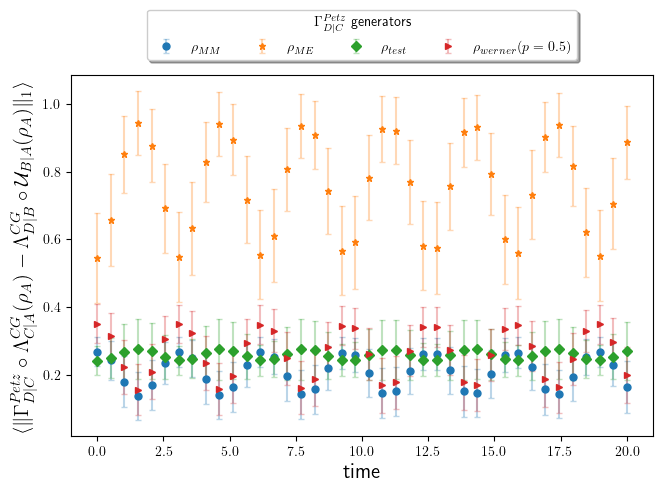

In [ ]:
#Plotting the line graphs
x = t_interval
markers = ['o','*','D']
linestyles = ['-',':','--']
plt.rcParams['text.usetex'] = True

for gen in generators_str:
  _, caps, bars = plt.errorbar(x=x,y=mean_setup_2_all_time[gen],yerr=std_setup_2_all_time[gen],label=generators_str_chart[generators_str.index(gen)],fmt=markers[generators_str.index(gen)], capsize=2,ms=5)
  [bar.set_alpha(0.3) for bar in bars]
  [cap.set_alpha(0.3) for cap in caps]

#for gen in generators_str:
#  plt.plot(x,mean_setup_2_all_time[gen],label=generators_str_chart[generators_str.index(gen)],linestyle=linestyles[generators_str.index(gen)])
#  plt.fill_between(x,np.array(mean_setup_2_all_time[gen]) + np.array(std_setup_2_all_time[gen]),np.array(mean_setup_2_all_time[gen]) - np.array(std_setup_2_all_time[gen]),alpha=0.2)
  #plt.errorbar(x=x,y=mean_setup_2_all_time[gen],yerr=std_setup_2_all_time[gen],label=generators_str_chart[generators_str.index(gen)], color ='black',linestyle=linestyles[generators_str.index(gen)])

plt.legend(loc='upper center', title= "Generators", bbox_to_anchor=(0.5, 1.2), fancybox= True, shadow =True, ncol= 3)
plt.tight_layout()
plt.yscale("linear")
plt.xlabel("time",fontsize=15)
plt.ylabel("$\langle \| \\Gamma_{D|C}^{Petz} \circ \\Lambda^{BnS}_{C|A} (\\rho_A) - \\Lambda^{BnS}_{D|B} \circ \\mathcal{U}^{\\sigma_z}_{B|A}(\\rho_A) \|_{1} \\rangle $",fontsize=15)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Changing time\t=20\Graphs\changing_time_setup_2.png",bbox_inches='tight')
plt.show()


##### Setup 4:  Partial trace + $\mathcal{U}^{\sigma_z}$

In [ ]:
%%time
results_setup_4_all_time = {}
choi_CG_trace = calc_choi_CG(d_A, d_C,coarse_graining_partial_trace_B)

for t in t_interval:
  print("\nt = {}".format(t))
  #Initializing the dictionary with the results of all generators for a given time
  results_setup_4_changing_t = {}

  for k in range(len(generators)):
    print("Calculating for the generator: {} ...".format(generators_str[k]))
    #Initializing the list of values for each generator
    results_setup_4_changing_t_gen = []
    #Setting the unitary channel at time t
    choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t))
    #Setting the recovery map
    recovery_map = petz_recovery_map(generators[k], kraus_partial_trace_B())
    #Generating the choi gamma Petz
    choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_sigma_z(t))

    for i in range(N_random):
      #Setting the random density operator
      rho_rand = random_operators[i]

      #Calculating the commutation relation
      rho_C = partial_trace(choi_CG_trace @ np.kron(rho_rand.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
      lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D], axis=0)
      rho_B = partial_trace(choi_U_sigma @ np.kron(rho_rand.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
      rhs = partial_trace(choi_CG_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

      #Computing the trace norm of lhs - rhs
      tr_norm = float(np.linalg.norm(lhs - rhs, ord='nuc').round(decimals=4))
      results_setup_4_changing_t_gen.append(tr_norm) #Saving the result for each rho_rand

    results_setup_4_changing_t[generators_str[k]] = results_setup_4_changing_t_gen #Saving the result for each generator at a given time

  results_setup_4_all_time['t={}'.format(t)] = results_setup_4_changing_t #Saving the results of all generators at a given time



t = 0.0
Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_test ...
Calculating for the generator: rho_werner ...

t = 0.5128205128205128
Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_test ...
Calculating for the generator: rho_werner ...

t = 1.0256410256410255
Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_test ...
Calculating for the generator: rho_werner ...

t = 1.5384615384615383
Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_test ...
Calculating for the generator: rho_werner ...

t = 2.051282051282051
Calculating for the generator: rho_MM ...
Calculating for the generator: rho_ME ...
Calculating for the generator: rho_test ...
Calculating for the generator: rho_werner ...

t = 2.564102564102564
Cal

In [ ]:
#Generating statistics from the results
mean_setup_4_all_time = {}
std_setup_4_all_time = {}

for gen in generators_str:
  #Initializing the dictionary values
  mean_setup_4_all_time[gen] = []
  std_setup_4_all_time[gen] = []

  for t in t_interval:
    #Saving the mean of the results for each t
    mean_setup_4_all_time[gen].append(float(np.mean(results_setup_4_all_time['t={}'.format(t)][gen])))
    #Saving the std of the results for each t
    std_setup_4_all_time[gen].append(float(np.std(results_setup_4_all_time['t={}'.format(t)][gen])))


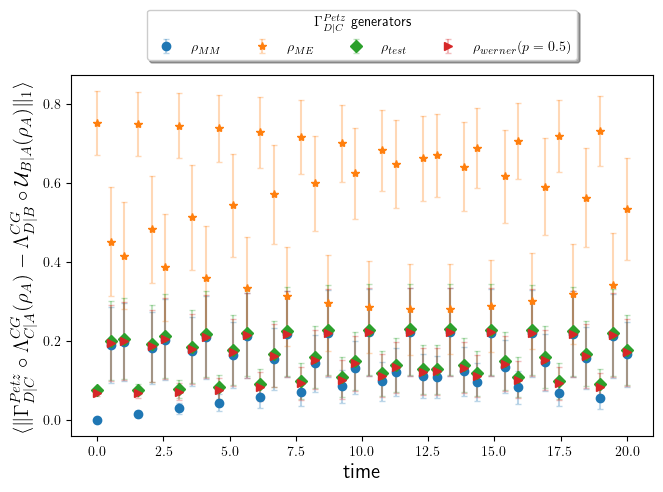

In [ ]:
#Plotting the line graphs

x = t_interval
markers = ['o','*','D']
linestyles = ['-',':','--']
plt.rcParams['text.usetex'] = True

for gen in generators_str:
  _, caps, bars = plt.errorbar(x=x,y=mean_setup_4_all_time[gen],yerr=std_setup_4_all_time[gen],label=generators_str_chart[generators_str.index(gen)],fmt=markers[generators_str.index(gen)], capsize=2,ms=6)
  [bar.set_alpha(0.3) for bar in bars]
  [cap.set_alpha(0.3) for cap in caps]

#for gen in generators_str:
  #plt.plot(x,mean_setup_4_all_time[gen],label=generators_str_chart[generators_str.index(gen)],linestyle=linestyles[generators_str.index(gen)])
  #plt.fill_between(x,np.array(mean_setup_4_all_time[gen]) + np.array(std_setup_4_all_time[gen]),np.array(mean_setup_4_all_time[gen]) - np.array(std_setup_4_all_time[gen]),alpha=0.2)
  #plt.errorbar(x=x,y=mean_setup_4_all_time[gen],yerr=std_setup_4_all_time[gen],label=generators_str_chart[generators_str.index(gen)], color ='black',linestyle=linestyles[generators_str.index(gen)])

plt.legend(loc='upper center', title= "$\\Gamma_{D|C}^{Petz}$ generators", bbox_to_anchor=(0.5, 1.2), fancybox= True, shadow =True, ncol= 3)
plt.tight_layout()
plt.yscale("linear")
plt.xlabel("time",fontsize=15)
plt.ylabel("$\langle \| \\Gamma_{D|C}^{Petz} \circ \\Lambda^{tr}_{C|A} (\\rho_'A) - \\Lambda^{tr}_{D|B} \circ \\mathcal{U}^{\\sigma_z}_{B|A}(\\rho_'A) \|_{1} \\rangle $",fontsize=15)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Changing time\t=20\Graphs\changing_time_setup_4.png",bbox_inches='tight')
plt.show()


In [ ]:
#Saving


#Setting the setup to save the results
with open(r'C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Changing time\t=20\results_setup_2_all_time.pickle', 'wb') as file:
    pickle.dump(results_setup_2_all_time, file, protocol=pickle.HIGHEST_PROTOCOL)

with open(r'C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Changing time\t=20\results_setup_4_all_time.pickle', 'wb') as file:
    pickle.dump(results_setup_4_all_time, file, protocol=pickle.HIGHEST_PROTOCOL)


#### Calculating for individual (best) states

In [ ]:
#Setting the constructors
generators = initial_states[:3]
generators_str = initial_states_str[:3]
generators_srt_chart = ["$\\rho_{\\text{ME}}$", "$\\rho_{\\text{MM}}$", "$\\rho_{\\text{W}}$"]
print("The generators used in this part are:",generators_str)

#Setting the time interval
t_interval = np.linspace(0,20,2000)


The generators used in this part are: ['rho_ME', 'rho_MM', 'rho_werner']


##### Setup 2: Blurred and saturated and z-interaction channel

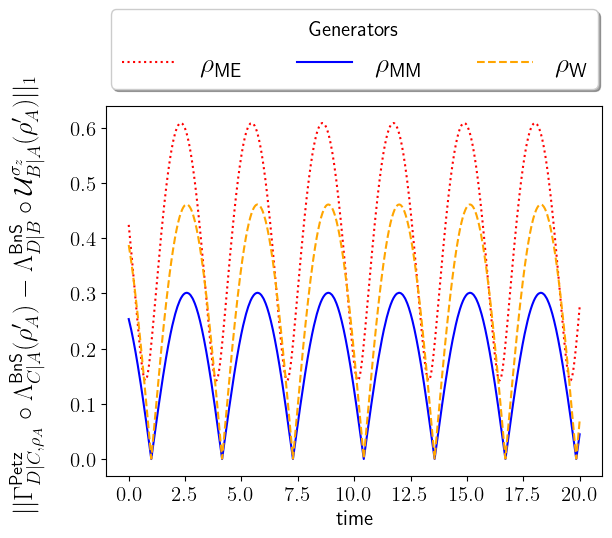

In [ ]:
best_random_states_setup_2 = {}


for gen in generators_str:
    index = results_setup_2[gen].index(min(results_setup_2[gen])) #Storing the index of the operator which achieves the best result
    best_random_states_setup_2[gen] = random_operators[index] #Saving the best operator for each generator

#Defining the dictionary which will store the results
time_varying_setup_2 = {}

#Defining the Choi of the coarse-graining map
choi_CG_blursatur = calc_choi_CG(d_A, d_C,coarse_graining_blursatur)

for i in range(len(generators_str)):
    gen = generators_str[i]
    best_state = best_random_states_setup_2[gen]
    #Setting the recovery map
    recovery_map = petz_recovery_map(generators[i], kraus_CG())
    results_time = []
    for t in t_interval:
        #Defining Choi of the unitary channel at time t
        choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t))
        #Generating the choi gamma Petz
        choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_blursatur,unitary_channel_sigma_z(t))

        #Calculating the commutativity relation with the best_state
        rho_C = partial_trace(choi_CG_blursatur @ np.kron(best_state.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
        rho_B = partial_trace(choi_U_sigma @ np.kron(best_state.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG_blursatur @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm
        tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=4))

        #Saving the results at each time step
        results_time.append(tr_norm)

    #Storing the results of each time for each generator
    time_varying_setup_2[gen] = results_time


#Generating graph
plt.rcParams.update({'font.size': 15})

x = t_interval
markers = ['o','*','D']
linestyles = [':','-','--']
hatchs = ['+', 'x', 'o']
colors_list = ["red","blue", "orange"]

for gen in generators_str:
  plt.plot(x,time_varying_setup_2[gen],colors_list[generators_str.index(gen)],label=generators_srt_chart[generators_str.index(gen)],linestyle=linestyles[generators_str.index(gen)])
  #plt.scatter(x,time_varying_setup_2[gen],label=generators_srt_chart[generators_str.index(gen)], marker=markers[generators_str.index(gen)])

plt.legend(loc='upper center', title= "Generators", bbox_to_anchor=(0.5, 1.3), fancybox= True, shadow =True, ncol= 3, fontsize = 20)
#plt.tight_layout()
plt.yscale("linear")
plt.xlabel("time",fontsize=15)
plt.xticks(np.arange(0, 20.1, 2.5))

plt.ylabel("$|| \\Gamma_{D|C, \\rho_A}^{\\text{Petz}} \circ \\Lambda^{\\text{BnS}}_{C|A} (\\rho'_A) - \\Lambda^{\\text{BnS}}_{D|B} \circ \\mathcal{U}^{\\sigma_z}_{B|A}(\\rho'_A) ||_{1}$",fontsize=19, labelpad=18)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Changing time\t=20\Graphs\Individual\changing_time_setup_2.png",bbox_inches='tight')
plt.show()



##### Setup 4: Partial trace and z-interaction channel

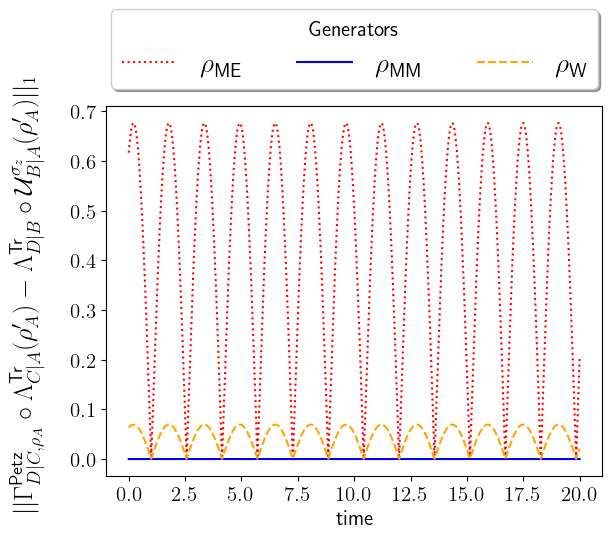

In [ ]:
best_random_states_setup_4 = {}

for gen in generators_str:
    index = results_setup_4[gen].index(min(results_setup_4[gen])) #Storing the index of the operator which achieves the best result
    best_random_states_setup_4[gen] = random_operators[index] #Saving the best operator for each generator

#Defining the dictionary which will store the results
time_varying_setup_4 = {}

#Defining the Choi of the coarse-graining map
choi_CG_partial_trace = calc_choi_CG(d_A, d_C,coarse_graining_partial_trace_B)

for i in range(len(generators_str)):
    gen = generators_str[i]
    best_state = best_random_states_setup_4[gen]
    #Setting the recovery map
    recovery_map = petz_recovery_map(generators[i], kraus_partial_trace_B())
    results_time = []
    for t in t_interval:
        #Defining Choi of the unitary channel at time t
        choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t))
        #Generating the choi gamma Petz
        choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_sigma_z(t))

        #Calculating the commutativity relation with the best_state
        rho_C = partial_trace(choi_CG_partial_trace @ np.kron(best_state.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
        rho_B = partial_trace(choi_U_sigma @ np.kron(best_state.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG_partial_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm
        tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=6))

        #Saving the results at each time step
        results_time.append(tr_norm)

    #Storing the results of each time for each generator
    time_varying_setup_4[gen] = results_time


#Generating graph
plt.rcParams.update({'font.size': 15})

x = t_interval
markers = ['o','*','D']
linestyles = [':','-','--']
hatchs = ['+', 'x', 'o']
colors_list = ["red","blue", "orange"]

for gen in generators_str:
  plt.plot(x,time_varying_setup_4[gen],colors_list[generators_str.index(gen)],label=generators_srt_chart[generators_str.index(gen)],linestyle=linestyles[generators_str.index(gen)])
  #plt.scatter(x,time_varying_setup_4[gen],label=generators_srt_chart[generators_str.index(gen)], marker=markers[generators_str.index(gen)])

plt.legend(loc='upper center', title= "Generators", bbox_to_anchor=(0.5, 1.3), fancybox= True, shadow =True, ncol= 3, fontsize= 20)
#plt.tight_layout()
plt.yscale("linear")
plt.xlabel("time",fontsize=15)
plt.xticks(np.arange(0, 20.1, 2.5))

plt.ylabel("$|| \\Gamma_{D|C, \\rho_A}^{\\text{Petz}} \circ \\Lambda^{\\text{Tr}}_{C|A} (\\rho'_A) - \\Lambda^{\\text{Tr}}_{D|B} \circ \\mathcal{U}^{\\sigma_z}_{B|A}(\\rho'_A) ||_{1}$",fontsize=19, labelpad=18)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Changing time\t=20\Graphs\Individual\changing_time_setup_4.png",bbox_inches='tight')
plt.show()



##### Testing the bests random operators of setup 4, $\rho_{MM}$ generator

In [ ]:
#Testing that it does selects the first operator in which achieves 0 in the commuting relation
index = results_setup_4["rho_MM"].index(min(results_setup_4["rho_MM"])) #Storing the index of the operator which achieves the best result
print(index)
test = random_operators[index]
print(test)

15120
[[0.21+0.j   0.2 -0.03j 0.17-0.05j 0.18-0.04j]
 [0.2 +0.03j 0.27+0.j   0.22-0.05j 0.17-0.05j]
 [0.17+0.05j 0.22+0.05j 0.29+0.j   0.22+0.01j]
 [0.18+0.04j 0.17+0.05j 0.22-0.01j 0.23+0.j  ]]


In [ ]:
#Getting the indices of the bests operators for rho_MM generator, setup 4
indices_of_bests = [ i for i, x in enumerate(results_setup_4['rho_MM']) if x == float(0)]
selected_bests_operators = [random_operators[i] for i in indices_of_bests]

print("Number of operators in which commute the diagram for setup 4, rho_MM generator:{}".format(len(selected_bests_operators)))
print("\nIndices of the bests random operators:")

print(indices_of_bests)

Number of operators in which commute the diagram for setup 4, rho_MM generator:28

Indices of the bests random operators:
[15120, 40263, 62920, 68496, 157075, 196165, 210044, 237394, 245095, 252576, 305990, 311762, 367724, 441655, 464442, 495012, 515153, 540746, 580336, 592170, 611899, 626530, 642600, 688627, 809874, 911822, 951982, 956095]


In [ ]:
selected_bests_operators[5]

array([[0.26+0.j  , 0.17+0.03j, 0.17+0.06j, 0.22+0.08j],
       [0.17-0.03j, 0.23+0.j  , 0.03+0.06j, 0.17+0.06j],
       [0.17-0.06j, 0.03-0.06j, 0.24+0.j  , 0.17-0.06j],
       [0.22-0.08j, 0.17-0.06j, 0.17+0.06j, 0.28+0.j  ]])

In [ ]:
selected_bests_operators[11]

array([[0.27+0.j  , 0.3 -0.02j, 0.09+0.07j, 0.11+0.09j],
       [0.3 +0.02j, 0.38+0.j  , 0.12+0.05j, 0.09+0.07j],
       [0.09-0.07j, 0.12-0.05j, 0.18+0.j  , 0.13-0.02j],
       [0.11-0.09j, 0.09-0.07j, 0.13+0.02j, 0.17+0.j  ]])

In [ ]:
#Verifying why for such 28 operators the diagram of scenario 4, for the dynamics generated by the rho_MM, commutes.
N_random_operators = 1e6
selected_operators = []
indices_selected =[]

for i in range(len(random_operators)):
    if random_operators[i][0][2] == random_operators[i][1][3]:
        selected_operators.append(random_operators[i])
        indices_selected.append(i)

print("Number of operators:{}".format(len(selected_operators)))
print("Is the indices of the bests equals to the selected? {}".format(indices_of_bests == indices_selected))


Number of operators:28
Is the indices of the bests equals to the selected? True


In [ ]:
generator = generators[0] #Setting rho_MM as generator

#Defining the Choi state of the Coarse-graining map
choi_CG_partial_trace = calc_choi_CG(d_A, d_C,coarse_graining_partial_trace_B)

#Setting the recovery map
recovery_map = petz_recovery_map(generator, kraus_partial_trace_B())

#Testing for t = 1

t = 1
choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t))
#Generating the choi gamma Petz
choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_sigma_z(t))

#Calculating the commutativity relation with the best_state
for best_state in selected_bests_operators:

    rho_C = partial_trace(choi_CG_partial_trace @ np.kron(best_state.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
    lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
    rho_B = partial_trace(choi_U_sigma @ np.kron(best_state.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
    rhs = partial_trace(choi_CG_partial_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

    #Computing the trace norm
    tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=6))
    #print("result:", tr_norm)
    if tr_norm != float(0):
        print("Ops... for t={} there is a problem!".format(t))


#Varying the t on the unitary channel

bests_that_vary = []
for t in t_interval:
    choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t))
    #Generating the choi gamma Petz
    choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_sigma_z(t))

    #Calculating the commutativity relation with the best_state
    for best_state in selected_bests_operators:
        rho_C = partial_trace(choi_CG_partial_trace @ np.kron(best_state.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
        rho_B = partial_trace(choi_U_sigma @ np.kron(best_state.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG_partial_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm
        tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=6))
        #print("result:", tr_norm)
        if tr_norm != float(0):
            print("Ops... t={} there is a problem!".format(t))
            bests_that_vary.append(best_state)

#Conclusion: In setup 4, for the rho_MM generator, if a random state commutes the diagrams for t=1, it commutes for all t\in [0,20]


In [ ]:
#Detailed analysis:
np.set_printoptions(precision=10, suppress= True)


generator = generators[0] #Setting rho_MM as generator

#Defining the Choi state of the Coarse-graining map
choi_CG_partial_trace = calc_choi_CG(d_A, d_C,coarse_graining_partial_trace_B)

#Setting the recovery map
recovery_map = petz_recovery_map(generator, kraus_partial_trace_B())
###########################################################
#Changing the parameters manually
t = 200
best_operator = selected_bests_operators[1]
##########################################################

choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t))

#Generating the choi gamma Petz
choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_sigma_z(t))

#Calculating the commutativity relation with the selected_bests_operators[0]
rho_C = partial_trace(choi_CG_partial_trace @ np.kron(best_operator.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
rho_B = partial_trace(choi_U_sigma @ np.kron(best_operator.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
rhs = partial_trace(choi_CG_partial_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

#Computing the trace norm
print("The L.H.S:")
print(lhs)
print("\nThe R.H.S:")
print(rhs)

print("\n L.H.S - R.H.S")
print(lhs - rhs)

tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=6))
print("\nresult:", tr_norm)

The L.H.S:
[[ 0.5707121364+0.j           -0.2181270654+0.0379351418j]
 [-0.2181270654-0.0379351418j  0.4292878636+0.j          ]]

The R.H.S:
[[ 0.5707121364+0.j           -0.2181270654+0.0379351418j]
 [-0.2181270654-0.0379351418j  0.4292878636+0.j          ]]

 L.H.S - R.H.S
[[ 0.+0.j -0.+0.j]
 [-0.-0.j  0.+0.j]]

result: 0.0


##### Testing the bests: $\rho_{ME}$ generator, setup 4

In [ ]:
min(time_varying_setup_4['rho_ME'])

0.005576

In [ ]:
#Searching in each position it achieves the minimum value
indices_of_bests_ME = [ i for i, x in enumerate(time_varying_setup_4['rho_ME']) if x == min(time_varying_setup_4['rho_ME'])]

for i in indices_of_bests_ME:
    print("Index of the minimum value achieved:{}".format(i))
print("Min value achieved: ", time_varying_setup_4['rho_ME'][indices_of_bests_ME[0]])
print("\n Timestep in which it was achieved: t = {}".format(t_interval[indices_of_bests_ME[0]]))

Index of the minimum value achieved:1984
Min value achieved:  0.005576

 Timestep in which it was achieved: t = 19.84992496248124


### Werner's plot

In [ ]:
#Defining the interval of the parameter l (until 0.99 for l=1 implies problems)
parameter_interval = np.linspace(-1/3,0.9999,2000)

generator = "rho_werner"
best_random_states_werner_gen = {}

#For setup 1
index_setup_1 = results_setup_1[generator].index(min(results_setup_1[generator])) #Storing the ind-ex of the operator which achieves the best result
best_random_states_werner_gen["setup_1"] = random_operators[index_setup_1] #Saving the best operator for each generator

#For setup_2
index_setup_2 = results_setup_2[generator].index(min(results_setup_2[generator])) #Storing the ind-ex of the operator which achieves the best result
best_random_states_werner_gen["setup_2"] = random_operators[index_setup_2] #Saving the best operator for each generator

#For setup_3
index_setup_3 = results_setup_3[generator].index(min(results_setup_3[generator])) #Storing the ind-ex of the operator which achieves the best result
best_random_states_werner_gen["setup_3"] = random_operators[index_setup_3] #Saving the best operator for each generator

#For setup_4
index_setup_4 = results_setup_4[generator].index(min(results_setup_4[generator])) #Storing the ind-ex of the operator which achieves the best result
best_random_states_werner_gen["setup_4"] = random_operators[index_setup_4] #Saving the best operator for each generator

results_werner_varl = {}

#Defining the Choi operators
choi_CG_blursatur = calc_choi_CG(d_A, d_C,coarse_graining_blursatur)
choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)
choi_CG_partial_trace = calc_choi_CG(d_A, d_C,coarse_graining_partial_trace_B)
choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t=1))



'\nnp.set_printoptions(precision=5, suppress= True)\n\nwerner_generator = generate_werner_Bell_projection(1)\nrho_C = sum(K @ werner_generator @ K.conj().T for K in kraus_CG())\nsqrt_rho_A = fractional_matrix_power(werner_generator, 0.5)\ninv_sqrt_rho_C = fractional_matrix_power(rho_C, -0.5)\n\nprint(rho_C)\nprint("\n")\nprint(sqrt_rho_A)\nprint("\n")\nprint(inv_sqrt_rho_C)\nprint("\n")\nprint(fractional_matrix_power(rho_C, 0.5) @ inv_sqrt_rho_C)\n'

In [ ]:

#Setup 1: BnS + SWAP ################################################################################

results_list = []
for l in parameter_interval:
        #Defining the werner state for each value of the parameter l
        werner_generator = generate_werner_Bell_projection(l)

        #Defining the recovery map for a given werner generator
        recovery_map = petz_recovery_map(werner_generator, kraus_CG())

        #Generating the choi gamma Petz
        choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_blursatur,unitary_channel_swap)

        #Calculating the commutativity relation with the best_state
        rho_C = partial_trace(choi_CG_blursatur @ np.kron(best_random_states_werner_gen['setup_1'].T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
        rho_B = partial_trace(choi_U_swap @ np.kron(best_random_states_werner_gen['setup_1'].T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG_blursatur @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm
        tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=6))

        #Saving the results at each time step
        results_list.append(tr_norm)

results_werner_varl['setup_1'] = results_list
del results_list



In [ ]:

#Setup 2: BnS + interaction-channel ################################################################################
results_list = []
for l in parameter_interval:
        #Defining the werner state for each value of the parameter l
        werner_generator = generate_werner_Bell_projection(l)

        #Defining the recovery map for a given werner generator
        recovery_map = petz_recovery_map(werner_generator, kraus_CG())

        #Generating the choi gamma Petz
        choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_blursatur,unitary_channel_sigma_z())

        #Calculating the commutativity relation with the best_state
        rho_C = partial_trace(choi_CG_blursatur @ np.kron(best_random_states_werner_gen['setup_2'].T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
        rho_B = partial_trace(choi_U_sigma @ np.kron(best_random_states_werner_gen['setup_2'].T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG_blursatur @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm
        tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=6))

        #Saving the results at each time step
        results_list.append(tr_norm)

results_werner_varl['setup_2'] = results_list
del results_list



In [ ]:

#Setup 3: Partial trace + SWAP ################################################################################

results_list = []
for l in parameter_interval:
        #Defining the werner state for each value of the parameter l
        werner_generator = generate_werner_Bell_projection(l)

        #Defining the recovery map for a given werner generator
        recovery_map = petz_recovery_map(werner_generator, kraus_partial_trace_B())

        #Generating the choi gamma Petz
        choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_swap)

        #Calculating the commutativity relation with the best_state
        rho_C = partial_trace(choi_CG_partial_trace @ np.kron(best_random_states_werner_gen['setup_3'].T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
        rho_B = partial_trace(choi_U_swap @ np.kron(best_random_states_werner_gen['setup_3'].T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG_partial_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm
        tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=6))

        #Saving the results at each time step
        results_list.append(tr_norm)

results_werner_varl['setup_3'] = results_list
del results_list

In [ ]:
#Setup 4: Partial trace + interaction channel ################################################################################

results_list = []
for l in parameter_interval:
        #Defining the werner state for each value of the parameter l
        werner_generator = generate_werner_Bell_projection(l)

        #Defining the recovery map for a given werner generator
        recovery_map = petz_recovery_map(werner_generator, kraus_partial_trace_B())

        #Generating the choi gamma Petz
        choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_sigma_z())

        #Calculating the commutativity relation with the best_state
        rho_C = partial_trace(choi_CG_partial_trace @ np.kron(best_random_states_werner_gen['setup_4'].T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
        lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)
        rho_B = partial_trace(choi_U_sigma @ np.kron(best_random_states_werner_gen['setup_4'].T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
        rhs = partial_trace(choi_CG_partial_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

        #Computing the trace norm
        tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=6))

        #Saving the results at each time step
        results_list.append(tr_norm)

results_werner_varl['setup_4'] = results_list
del results_list

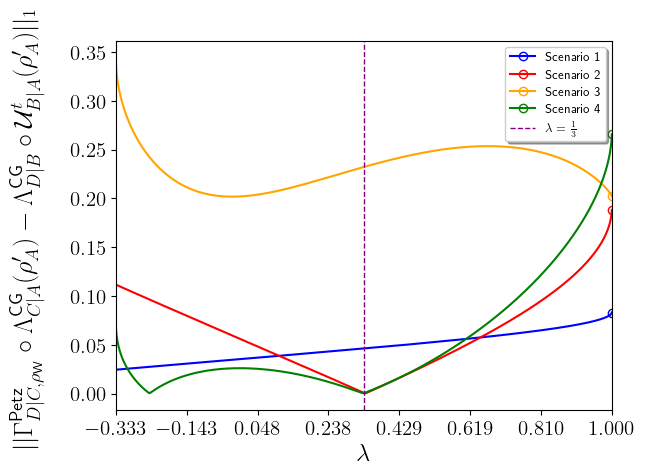

In [ ]:
#Generating the graph

plt.rcParams.update({'font.size': 15})

x = parameter_interval

markers = ['o','*','D']
linestyles = ['-','-','-','-']
hatchs = ['+', 'x', 'o']
colors_list = ["blue", "red", "orange","green"]
setups_list = ["setup_1","setup_2","setup_3","setup_4"]
setups_names = ["Scenario 1", "Scenario 2", "Scenario 3", "Scenario 4"]

for setup in setups_list:
  plt.plot(x,results_werner_varl[setup],colors_list[setups_list.index(setup)],label=setups_names[setups_list.index(setup)],linestyle=linestyles[setups_list.index(setup)], marker='o',markevery=[-1],mfc='none')

plt.axvline(x=1/3, color='purple', linestyle='--', linewidth=1, label='$\\lambda = \\frac{1}{3}$')
#plt.axvline(x=1/np.sqrt(2), color='black', linestyle='--', linewidth=1, label='$\\lambda = \\frac{1}{\sqrt{2}}$')
#plt.axvline(x=1/2, color='grey', linestyle='--', linewidth=1, label='$\\lambda = \\frac{1}{2}$')

plt.legend(loc='upper right', frameon = True, fancybox= True, shadow =True, ncol= 1, fontsize= 9)
#plt.tight_layout()
plt.yscale("linear")
plt.xlabel("$\\lambda$",fontsize=18)

plt.xticks(np.linspace(-1/3,1,8))
plt.xlim(-1/3,1.0)
plt.yticks(np.arange(0,0.40,0.050))
plt.title(" ",pad=10)
plt.ylabel("$|| \\Gamma_{D|C, \\rho_{\\text{W}}}^{\\text{Petz}} \circ \\Lambda^{\\text{CG}}_{C|A} (\\rho'_A) - \\Lambda^{\\text{CG}}_{D|B} \circ \\mathcal{U}^{t}_{B|A}(\\rho'_A) ||_{1}$",fontsize=19, labelpad=18)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Werner generators\werner_plot.png",bbox_inches='tight')
plt.show()



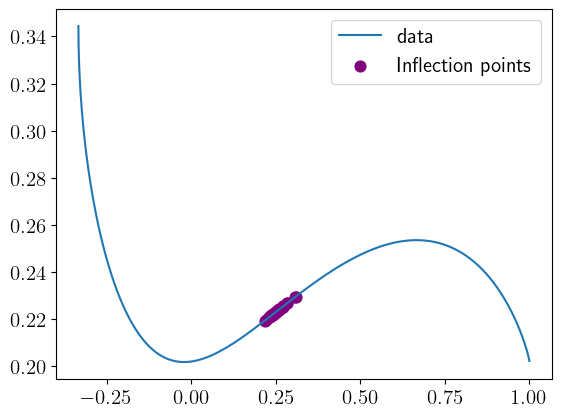

In [ ]:
#Calculating inflection points: a point where a graph changes its curvature

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

x = np.array(parameter_interval)
y = np.array(results_werner_varl['setup_3'])

y_smooth = savgol_filter(y, window_length=11, polyorder=3)

dy  = savgol_filter(y, window_length=11, polyorder=3, deriv=1, delta=x[1]-x[0])
ddy = savgol_filter(y, window_length=11, polyorder=3, deriv=2, delta=x[1]-x[0])

#dy = np.gradient(y_smooth, x)
#ddy = np.gradient(dy, x)

# Inflection points: sign change in second derivative (picking up the first index between dff[i] and dff[i+1])
infl_idx = np.where(np.diff(np.sign(ddy)) != 0)[0] #Select exactly those indices where the sign of the curvature changes.

#sign = [ 1,  1,  1, -1, -1 ]
#diff = [ 0,  0, -2,  0 ] #Picking just where is different to zero, i.e, +2 or -2

#Putting a threshold to remove noise
#threshold = 0.1 * np.max(np.abs(ddy))
#valid = np.abs(ddy[infl_idx]) > threshold
#infl_idx = infl_idx[valid]


x_infl = x[infl_idx]
y_infl = y[infl_idx]

#print(len(y_infl))
#print(x_infl)

plt.plot(x, y, label="data")
plt.scatter(x_infl, y_infl, color="purple", s=60, label="Inflection points")
plt.legend()
plt.show()

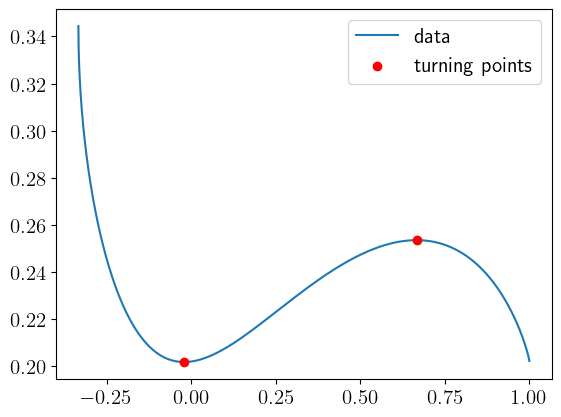

In [ ]:
#Calculating turning points
x = parameter_interval
y = np.array(results_werner_varl['setup_3'])

y_smooth = savgol_filter(y, window_length=11, polyorder=3)
dy = np.gradient(y_smooth, x)

sign = np.sign(dy)
tp_candidates = np.where(np.abs(np.diff(sign)) == 2)[0]

clusters = []
current = [tp_candidates[0]]

for idx in tp_candidates[1:]:
    if idx == current[-1] + 1:
        current.append(idx)
    else:
        clusters.append(current)
        current = [idx]

clusters.append(current)

tp_idx = [
    cluster[np.argmin(np.abs(dy[cluster]))]
    for cluster in clusters
]

turning_points = []

for i in tp_idx:
    if dy[i-1] > 0 and dy[i+1] < 0:
        kind = "maximum"
    elif dy[i-1] < 0 and dy[i+1] > 0:
        kind = "minimum"
    else:
        kind = "flat"

    turning_points.append((i, kind))

x_tp = x[tp_idx]
y_tp = y[tp_idx]

plt.plot(x, y, label="data")
plt.scatter(x_tp, y_tp, c="red", zorder=3, label="turning points")
plt.legend()
plt.show()

In [ ]:
x_tp

array([0.34])

### Box plots



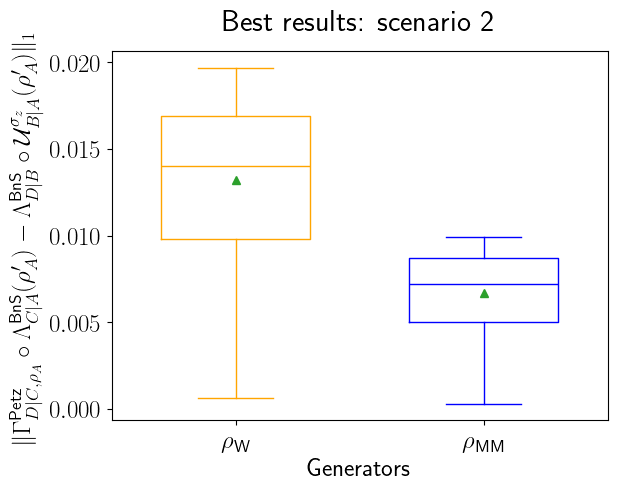

In [ ]:
#For setup 2
plt.rcParams.update({'font.size': 18})

#Picking up the smallest 1000 results
N_best = 1000
best_results_rhoMM_setup2 = sorted(results_setup_2["rho_MM"])[:N_best]
best_results_rhoWerner_setup2 =sorted(results_setup_2["rho_werner"])[:N_best]

#Generating the boxplot
fig, ax = plt.subplots()

data1 = best_results_rhoWerner_setup2
data2 = best_results_rhoMM_setup2

# First boxplot (red edges)

ax.boxplot(data1, positions=[1], widths=0.6,
           boxprops=dict(color="orange"),
           whiskerprops=dict(color="orange"),
           capprops=dict(color="orange"),
           medianprops=dict(color="orange"),
           flierprops=dict(markeredgecolor="orange"),
           showmeans=True)

# Second boxplot (blue edges)
ax.boxplot(data2, positions=[2], widths=0.6,
           boxprops=dict(color="blue"),
           whiskerprops=dict(color="blue"),
           capprops=dict(color="blue"),
           medianprops=dict(color="blue"),
           flierprops=dict(markeredgecolor="blue"),
           showmeans=True)

# Labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['$\\rho_{\\text{W}}$', '$\\rho_{\\text{MM}}$'])
ax.set_xlabel("Generators")
ax.set_ylabel("$\| \\Gamma_{D|C,\\rho_A}^{\\text{Petz}} \circ \\Lambda^{\\text{BnS}}_{C|A} (\\rho'_A) - \\Lambda^{\\text{BnS}}_{D|B} \circ \\mathcal{U}^{\\sigma_z}_{B|A}(\\rho'_A) \|_{1}$")      # <--- y-axis label here
ax.set_title("Best results: scenario 2",pad=15)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Box plots\bp_setup2.png",bbox_inches='tight')
plt.show()

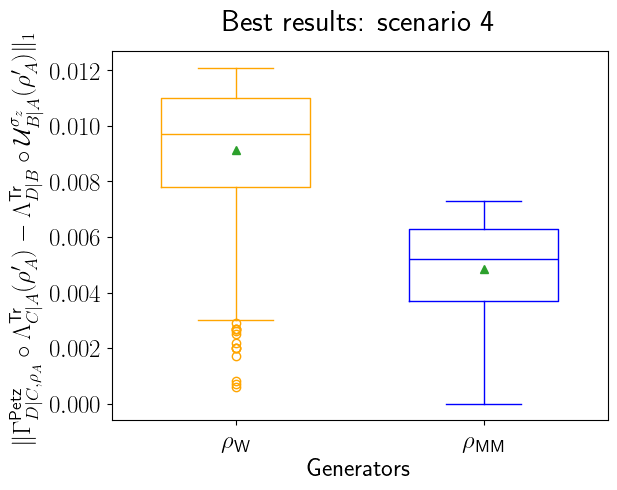

In [ ]:
#For setup 4
plt.rcParams.update({'font.size': 18})

#Picking up the smallest 1000 results
N_best = 1000
best_results_rhoMM_setup4 = sorted(results_setup_4["rho_MM"])[:N_best]
best_results_rhoWerner_setup4 =sorted(results_setup_4["rho_werner"])[:N_best]
#Generating the boxplot

fig, ax = plt.subplots()

data3 = best_results_rhoWerner_setup4
data4 = best_results_rhoMM_setup4

# First boxplot (red edges)

ax.boxplot(data3, positions=[1], widths=0.6,
           boxprops=dict(color="orange"),
           whiskerprops=dict(color="orange"),
           capprops=dict(color="orange"),
           medianprops=dict(color="orange"),
           flierprops=dict(markeredgecolor="orange"),
           showmeans=True)

# Second boxplot (blue edges)
ax.boxplot(data4, positions=[2], widths=0.6,
           boxprops=dict(color="blue"),
           whiskerprops=dict(color="blue"),
           capprops=dict(color="blue"),
           medianprops=dict(color="blue"),
           flierprops=dict(markeredgecolor="blue"),
           showmeans=True)

# Labels
ax.set_xticks([1, 2])
ax.set_xticklabels(['$\\rho_{\\text{W}}$', '$\\rho_{\\text{MM}}$'])
ax.set_xlabel("Generators")
ax.set_ylabel("$\| \\Gamma_{D|C,\\rho_A}^{\\text{Petz}} \circ \\Lambda^{\\text{Tr}}_{C|A} (\\rho'_A) - \\Lambda^{\\text{Tr}}_{D|B} \circ \\mathcal{U}^{\\sigma_z}_{B|A}(\\rho'_A) \|_{1}$")      # <--- y-axis label here
ax.set_title("Best results: scenario 4", pad=15)
plt.savefig(r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Box plots\bp_setup4.png",bbox_inches='tight')
plt.show()

#Extra

## Generalizing

In [ ]:
from _typeshed import NoneType

def generate_histograms_data(operators: List[np.ndarray], generators: List[np.ndarray], krauss_coarse_graining: Callable[[NoneType],np.ndarray], coarse_graining_map: Callable[[np.ndarray],np.ndarray], unitary_channel: Callable[[np.ndarray],np.ndarray]) -> np.ndarray:

  results_setup = {}
  choi_CG_blursatur = calc_choi_CG(d_A, d_C,coarse_graining_map)
  choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel)

  for k in range(len(generators)):
    print("Calculating for the generator: {} ...".format(generators_str[k]))
    results_setup_1_gen = []
    #Setting the recovery map
    recovery_map = petz_recovery_map(generators[k], kraus_CG())
    #Generating the choi gamma Petz
    choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_map,unitary_channel)

    for i in range(len(operators)):
      #Setting the random density operator
      rho_rand = operators[i]

      #Calculating the commutation relation
      rho_C = partial_trace(choi_CG_blursatur @ np.kron(rho_rand.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
      lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

      rho_B = partial_trace(choi_U_swap @ np.kron(rho_rand.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
      rhs = partial_trace(choi_CG_blursatur @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

      #Computing the trace norm of lhs - rhs
      tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=4))
      results_setup_1_gen.append(tr_norm) #Saving the result for each rho_rand

    results_setup[generators_str[k]] = results_setup_1_gen #Saving the result for each generator

## Finding the best $\rho_A$

### Genetic algorithm

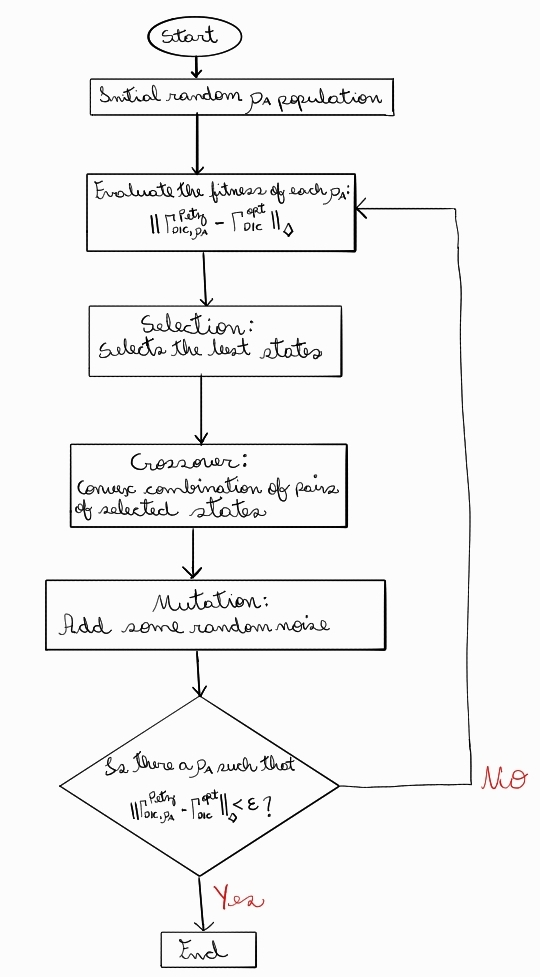

In [ ]:
#TODO:

#1 - To think about of how will be the crossover and the mutation procedure
#2 - Run some tests with the well known initial states which gives the Gamma_Petz closest to the Gamma_opt (rho_mix and rho_werner)
#2 -To start to construct the genetic algorithm to find the best rho_A in which its the gamma_Petz is closest as possible to the gamma_opt

#convex combination parameter

t = 0.5

#Setting the initial state
rho_A =  t* rho_mix + (1-t)*rho_test

#Generating the choi Gamma Petz
recovery_map = petz_recovery_map(rho_A, kraus_CG())
choi_Gamma_petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map, coarse_graining_blursatur, unitary_channel_swap)

print("Choi Gamma-Petz:")
print(choi_Gamma_petz)

print("\nChoi Gamma-opt")
print(choi_Gamma_opt_solution)

#Computing the diamond norm between Choi-Gamma Petz and Choi-Gamma^{opt} for the blurred and saturated dectector and SWAP configuration
print("\nDiamond norm distance between Gamma-Petz and Gamma-opt:")
print(diamond_norm(Choi(choi_Gamma_petz) - Choi(choi_Gamma_opt_solution), solver ="MOSEK"))

#Maybe rho_mix is the "best" rho_A and there isn't anything to do to improve this.

NameError: name 'rho_test' is not defined

### Proportion between results

#### Loading the results

In [ ]:
path_1 = r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Results pickles\Standardized\1.000.000 states\results_setup_1.pickle"
path_2 = r"C:\Users\fonse\OneDrive\Área de Trabalho\Work files\Histograms\Results pickles\Standardized\1e7 states\results_setup_1_1e7_ME.pickle"

with open(path_1, 'rb') as handle:
    results_setup_1_1e6 = pickle.load(handle)

with open(path_2, 'rb'): as handle:
    results_setup_1_1e7_ME = pickle.load(handle)

#### Generating the results for $\rho_{ME}$, setup 1, with 1e7 states

In [ ]:
%%time

results_setup_1_1e7_ME = {}
choi_CG_blursatur = calc_choi_CG(d_A, d_C,coarse_graining_blursatur)
choi_U_swap = calc_choi_U(d_A,d_B,unitary_channel_swap)

for k in range(len(generators)):
  if generators_str[k] == "rho_ME":
    print("Calculating for the generator: {} ...".format(generators_str[k]))
    results_setup_1_gen = []
    #Setting the recovery map
    recovery_map = petz_recovery_map(generators[k], kraus_CG())
    #Generating the choi gamma Petz
    choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_blursatur,unitary_channel_swap)

    for i in range(len(random_operators)):
      #Setting the random density operator
      rho_rand = random_operators[i]

      #Calculating the commutation relation
      rho_C = partial_trace(choi_CG_blursatur @ np.kron(rho_rand.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
      lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D],  axis=0)

      rho_B = partial_trace(choi_U_swap @ np.kron(rho_rand.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
      rhs = partial_trace(choi_CG_blursatur @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

      #Computing the trace norm of lhs - rhs
      tr_norm = float(np.linalg.norm(lhs - rhs,ord='nuc').round(decimals=4))
      results_setup_1_gen.append(tr_norm) #Saving the re  sult for each rho_rand

    results_setup_1_1e7_ME[generators_str[k]] = results_setup_1_gen #Saving the result for each generator

Calculating for the generator: rho_ME ...
CPU times: total: 2h 52min 29s
Wall time: 3h 1min 13s


#### Generating the histogram data and the proportions

In [ ]:
#Setting the bin intervals
bins = np.linspace(0,1.5,50)
np.set_printoptions(precision=6)

# For 1000000 states
N_random_1 = 1e6
frequency_1,_=  np.histogram(results_setup_1_1e6['rho_ME'],bins)
print("==================================================")
print("rho_ME, 1e6 states, setup 1 ")
print("==================================================")

print("Frequency per bin:" )
print(frequency_1)

print("\nProportion for each bin:")
proportion_1 = frequency_1/N_random_1
print(proportion_1)
print("\n")

#################################################################
#For 10000000 states
N_random_2 = 1e7

frequency_2,_=  np.histogram(results_setup_1_1e7_ME['rho_ME'],bins)
print("==================================================")
print("rho_ME, 1e7 states, setup 1 ")
print("==================================================")

print("Frequency per bin:" )
print(frequency_2)

print("\nProportion for each bin:")
proportion_2 = frequency_2/N_random_2
print(proportion_2)

print("\nIs proportion_1 equals to proportion_2?")
print(np.round(proportion_1,3) == np.round(proportion_2,3))



rho_ME, 1e6 states, setup 1 
Frequency per bin:
[    4    26    73   226   553  1291  2606  5090  9059 14812 23371 34189
 46605 60079 73059 82815 89537 91064 87905 81094 70758 59548 48253 37229
 27540 19559 13460  8524  5196  3099  1783   928   422   172    52    17
     2     0     0     0     0     0     0     0     0     0     0     0
     0]

Proportion for each bin:
[0.000004 0.000026 0.000073 0.000226 0.000553 0.001291 0.002606 0.00509
 0.009059 0.014812 0.023371 0.034189 0.046605 0.060079 0.073059 0.082815
 0.089537 0.091064 0.087905 0.081094 0.070758 0.059548 0.048253 0.037229
 0.02754  0.019559 0.01346  0.008524 0.005196 0.003099 0.001783 0.000928
 0.000422 0.000172 0.000052 0.000017 0.000002 0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.      ]


rho_ME, 1e7 states, setup 1 
Frequency per bin:
[    26    248    802   2342   5637  12651  26472  50847  91356 150107
 234129 339214 467067 598838 727982 830375 896553 910520 878667 80865

#### Histograms

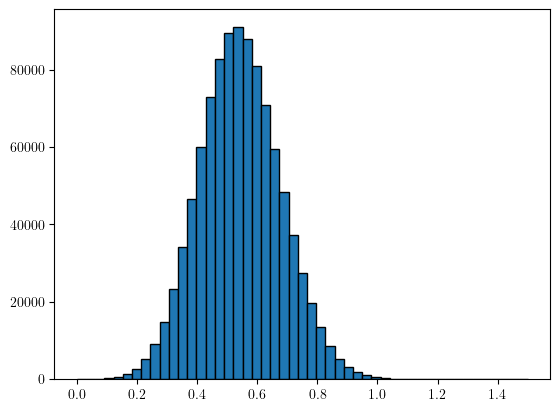

In [ ]:
#1e6 states, rho_ME, setup 1
plt.hist(results_setup_1_1e6['rho_ME'],bins, edgecolor ="black")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

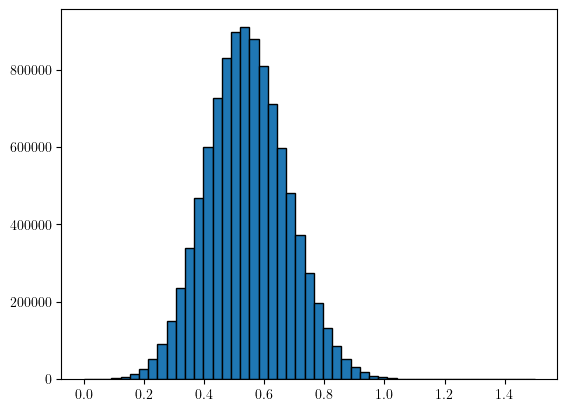

In [ ]:
#1e7 states, rho_ME, setup 1
plt.hist(results_setup_1_1e7_ME['rho_ME'],bins, edgecolor="black")
plt.show

## Tests


In [ ]:
def diamond_norm_implemented(choi1, choi2,d_A,d_B):

    #Setting the SDP variables
    Z1 = cp.Variable((d_A * d_B, d_A * d_B), hermitian=True) # \in L(H_C ⊗ H_D})
    Z2 = cp.Variable((d_A * d_B, d_A * d_B), hermitian=True) # \in L(H_C ⊗ H_D}))
    epsilon = cp.Variable()

    # Constraints
    constraints = []


    # 2. Diamond norm ball constraints
    constraints += [
       choi1 - choi2 == Z2 - Z1,
        Z1 >> 0,
        Z2 >> 0,
        epsilon * np.eye(d_A) >>  cp.partial_trace(Z1 + Z2, dims=[d_A, d_B], axis=1)
        ]


    # Minimize epsilon
    prob = cp.Problem(cp.Minimize(epsilon), constraints) #Feasibility problem
    prob.solve(solver=cp.MOSEK, verbose=False)

    if prob.status == cp.OPTIMAL:
        return  float(epsilon.value)
    else:
        print("No feasible solution found.")
        return None

In [ ]:
d_A= 4
d_B = 4
d_C = 2

choi_CG1 = calc_choi_CG(d_A,d_C, coarse_graining_blursatur)
choi_CG2 = calc_choi_CG(d_A,d_C, coarse_graining_partial_trace_B)

choi_U_1 = calc_choi_U(d_A, d_B,unitary_channel_sigma_z())
choi_U_2 = calc_choi_U(d_A, d_B,unitary_channel_swap)

In [ ]:
dNorm1 = diamond_norm_implemented(choi_CG1, choi_CG2,d_A, d_C)
print(dNorm1)

2.0000000001211196


In [ ]:
dNorm2 = diamond_norm(Choi(choi_CG1 - choi_CG2))
print(dNorm2)

2.0000229008965653


In [ ]:
choi_Gamma_feasible = find_GammaChoi_feasibility(choi_CG_blur,choi_U_swap, d_A, d_B, d_C, d_D)
diamond_distances_feasibility1 = {}
diamond_distances_feasibility2 = {}

for i in range(len(initial_states)):
    #Constructing the Choi states for a fixed rho_A constructor
    rho_A_ctc = initial_states[i]
    choi_Gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,petz_recovery_map(rho_A_ctc,kraus_CG()),coarse_graining_blursatur,unitary_channel_swap)
    diamond_distances_feasibility1[initial_states_str[i]] = float(diamond_norm(Choi(choi_Gamma_feasible) - Choi(choi_Gamma_Petz),solver="MOSEK"))

# Diamond norm distances
print("\n Diamond norm distance between the Gamma Petz and the Gamma feasible (calculated using Qiskit)")
print(diamond_distances_feasibility1)


for i in range(len(initial_states)):
    #Constructing the Choi states for a fixed rho_A constructor
    rho_A_ctc = initial_states[i]
    choi_Gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,petz_recovery_map(rho_A_ctc,kraus_CG()),coarse_graining_blursatur,unitary_channel_swap)
    diamond_distances_feasibility2[initial_states_str[i]] = float(diamond_norm_implemented(choi_Gamma_feasible, choi_Gamma_Petz, d_C, d_D))

# Diamond norm distances
print("\n Diamond norm distance between the Gamma Petz and the Gamma feasible (calculated using my implementation)")
print(diamond_distances_feasibility2)



 Diamond norm distance between the Gamma Petz and the Gamma feasible (calculated using Qiskit)
{'rho_MM': 0.42264973000137684, 'rho_ME': 1.666666653641263, 'rho_werner': 0.5527864036846353, 'rho_random': 0.7067786580908754, 'rho_test': 0.5035407278539705}

 Diamond norm distance between the Gamma Petz and the Gamma feasible (calculated using my implementation)
{'rho_MM': 0.42264972762365594, 'rho_ME': 1.6666666486917159, 'rho_werner': 0.5527864027300746, 'rho_random': 0.7067786479283192, 'rho_test': 0.5035407447272107}


### Testing the partial trace

In [ ]:
test = np.array([[0,0,0,0],
                [0,1,0,0],
                [0,0,0,0],
                [0,0,0,0]])
print("With cvxpy:")
print(cp.partial_trace(test, dims=[2,2], axis=1).value)

print("With my method:")
print(partial_trace(test, dims=[2,2], axis=1))



With cvxpy:
[[1. 0.]
 [0. 0.]]
With my method:
[[1. 0.]
 [0. 0.]]


In [ ]:
rho_random

array([[0.21+0.j  , 0.24+0.07j, 0.1 +0.08j, 0.12+0.09j],
       [0.24-0.07j, 0.43+0.j  , 0.18+0.09j, 0.24+0.12j],
       [0.1 -0.08j, 0.18-0.09j, 0.14+0.j  , 0.12+0.03j],
       [0.12-0.09j, 0.24-0.12j, 0.12-0.03j, 0.21+0.j  ]])

In [ ]:
%%time
coarse_graining_partial_trace_B(rho_random)

CPU times: user 284 µs, sys: 6 µs, total: 290 µs
Wall time: 296 µs


array([[0.16+0.j , 0.26+0.1j],
       [0.26-0.1j, 0.84+0.j ]])

In [ ]:
%%time
partial_trace(rho_random, dims=[2, 2], axis=1)

CPU times: user 359 µs, sys: 0 ns, total: 359 µs
Wall time: 374 µs


array([[0.16+0.j , 0.26+0.1j],
       [0.26-0.1j, 0.84+0.j ]])

In [ ]:
%%time
cp.partial_trace(rho_random, dims=[2, 2], axis=1).value

CPU times: user 8.17 ms, sys: 0 ns, total: 8.17 ms
Wall time: 18.8 ms


array([[0.16+0.j , 0.26+0.1j],
       [0.26-0.1j, 0.84+0.j ]])

In [ ]:
t= 1

choi_CG_trace = calc_choi_CG(d_A, d_C,coarse_graining_partial_trace_B)
choi_U_sigma = calc_choi_U(d_A,d_B,unitary_channel_sigma_z(t))
#Setting the recovery map
recovery_map = petz_recovery_map(generators[0], kraus_partial_trace_B())
#Generating the choi gamma Petz
choi_gamma_Petz = calc_choi_Gamma_petz_act(d_C,d_D,recovery_map,coarse_graining_partial_trace_B,unitary_channel_sigma_z(t))


In [ ]:
%%time

rho_C = cp.partial_trace(choi_CG_trace @ np.kron(rho_random.T, np.eye(d_C)), dims=[d_A, d_C], axis=0).value
lhs = cp.partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D], axis=0)
rho_B = cp.partial_trace(choi_U_sigma @ np.kron(rho_random.T, np.eye(d_B)), dims=[d_A, d_B], axis=0).value
rhs = cp.partial_trace(choi_CG_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

CPU times: total: 0 ns
Wall time: 0 ns


NameError: name 'choi_CG_trace' is not defined

In [ ]:
A = np.random.randint(10, size=(d_A, d_A))  + 1j * np.random.randint(10, size=(d_A, d_A))
rho_random = A @ A.conj().T
rho_random = (1/np.trace(rho_random))*rho_random

In [ ]:
%%time
rho_C = cp.partial_trace(choi_CG_trace @ np.kron(rho_random.T, np.eye(d_C)), dims=[d_A, d_C], axis=0).value
print(rho_C)

[[0.64+0.j  0.34+0.2j]
 [0.34-0.2j 0.36+0.j ]]
CPU times: user 8.51 ms, sys: 0 ns, total: 8.51 ms
Wall time: 8.42 ms


In [ ]:
%%time
rho_C = partial_trace(choi_CG_trace @ np.kron(rho_random.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
print(rho_C)

[[0.64+0.j  0.34+0.2j]
 [0.34-0.2j 0.36+0.j ]]
CPU times: user 618 µs, sys: 87 µs, total: 705 µs
Wall time: 711 µs


In [ ]:
#With cvxpy
%%time
rho_C = cp.partial_trace(choi_CG_trace @ np.kron(rho_random.T, np.eye(d_C)), dims=[d_A, d_C], axis=0).value
lhs = cp.partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D], axis=0).value
rho_B = cp.partial_trace(choi_U_sigma @ np.kron(rho_random.T, np.eye(d_B)), dims=[d_A, d_B], axis=0).value
rhs = cp.partial_trace(choi_CG_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0).value

CPU times: user 25.4 ms, sys: 2.65 ms, total: 28 ms
Wall time: 28 ms


In [ ]:
print("LHS:")
print(lhs)
print("\nRHS:")
print(rhs)

LHS:
[[ 0.16+0.j   -0.11-0.04j]
 [-0.11+0.04j  0.84+0.j  ]]

RHS:
[[ 0.16+0.j   -0.07+0.02j]
 [-0.07-0.02j  0.84+0.j  ]]


In [ ]:
#With my method
%%time
rho_C = partial_trace(choi_CG_trace @ np.kron(rho_random.T, np.eye(d_C)), dims=[d_A, d_C], axis=0)
lhs = partial_trace(choi_gamma_Petz @ np.kron(rho_C.T,np.eye(d_D)), dims=[d_C,d_D], axis=0)
rho_B = partial_trace(choi_U_sigma @ np.kron(rho_random.T, np.eye(d_B)), dims=[d_A, d_B], axis=0)
rhs = partial_trace(choi_CG_trace @ np.kron(rho_B.T, np.eye(d_D)), dims=[d_B, d_D], axis=0)

CPU times: user 1.7 ms, sys: 0 ns, total: 1.7 ms
Wall time: 1.71 ms


In [ ]:
print("LHS:")
print(lhs)
print("\nRHS:")
print(rhs)

LHS:
[[ 0.16+0.j   -0.11-0.04j]
 [-0.11+0.04j  0.84+0.j  ]]

RHS:
[[ 0.16+0.j   -0.07+0.02j]
 [-0.07-0.02j  0.84+0.j  ]]
